In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
results = pd.read_csv("./results.csv")
faultless = results[results["probability"].isna()]
faulty = results[results["probability"].notna()]

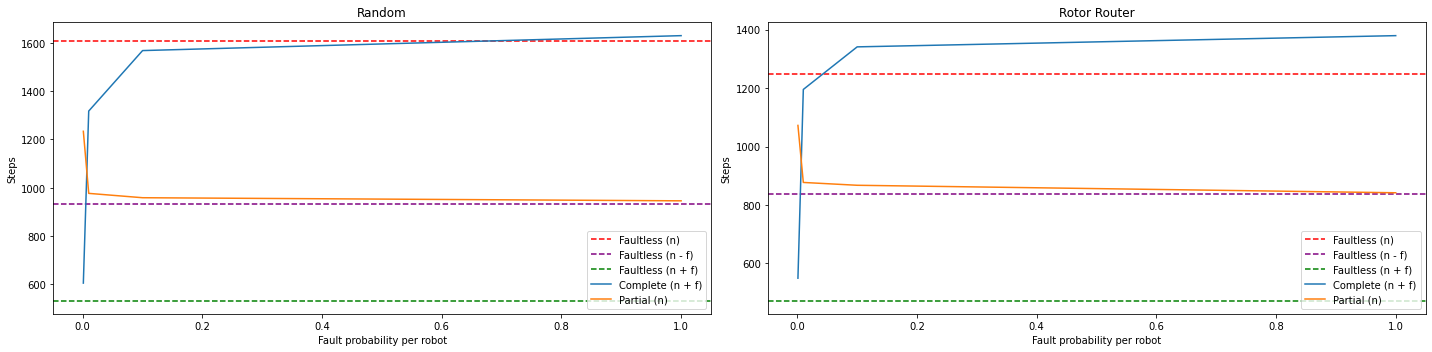

In [4]:
# GENERAL
general_rw_fl_normal = faultless[(faultless["algorithm_type"] == "RANDOM") & (faultless["nodes"] == faultless["robots"])]["steps"].mean()
general_rw_fl_plus = faultless[(faultless["algorithm_type"] == "RANDOM") & (faultless["nodes"] < faultless["robots"])]["steps"].mean()
general_rw_fl_minus = faultless[(faultless["algorithm_type"] == "RANDOM") & (faultless["nodes"] > faultless["robots"])]["steps"].mean()
general_rw_fy_c = faulty[(faulty["algorithm_type"] == "RANDOM") & (faulty["nodes"] < faulty["robots"])].groupby("probability")["steps"].mean()
general_rw_fy_p = faulty[(faulty["algorithm_type"] == "RANDOM") & (faulty["nodes"] >= faulty["robots"])].groupby("probability")["steps"].mean()

general_rr_fl_normal = faultless[(faultless["algorithm_type"] == "ROTOR_ROUTER") & (faultless["nodes"] == faultless["robots"])]["steps"].mean()
general_rr_fl_plus = faultless[(faultless["algorithm_type"] == "ROTOR_ROUTER") & (faultless["nodes"] < faultless["robots"])]["steps"].mean()
general_rr_fl_minus = faultless[(faultless["algorithm_type"] == "ROTOR_ROUTER") & (faultless["nodes"] > faultless["robots"])]["steps"].mean()
general_rr_fy_c = faulty[(faulty["algorithm_type"] == "ROTOR_ROUTER") & (faulty["nodes"] < faulty["robots"])].groupby("probability")["steps"].mean()
general_rr_fy_p = faulty[(faulty["algorithm_type"] == "ROTOR_ROUTER") & (faulty["nodes"] >= faulty["robots"])].groupby("probability")["steps"].mean()

# create a grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# plot the data for the first chart
axs[0].axhline(y = general_rw_fl_normal, color="red", linestyle="--", label = "Faultless (n)")
axs[0].axhline(y = general_rw_fl_minus, color="purple", linestyle="--", label = "Faultless (n - f)")
axs[0].axhline(y = general_rw_fl_plus, color="green", linestyle="--", label = "Faultless (n + f)")
axs[0].plot(general_rw_fy_c.index, general_rw_fy_c.values, label = "Complete (n + f)")
axs[0].plot(general_rw_fy_p.index, general_rw_fy_p.values, label = "Partial (n)")

axs[0].set_xlabel("Fault probability per robot")
axs[0].set_ylabel("Steps")
axs[0].set_title('Random')
axs[0].legend()

# plot the data for the second chart
axs[1].axhline(y = general_rr_fl_normal, color="red", linestyle="--", label = "Faultless (n)")
axs[1].axhline(y = general_rr_fl_minus, color="purple", linestyle="--", label = "Faultless (n - f)")
axs[1].axhline(y = general_rr_fl_plus, color="green", linestyle="--", label = "Faultless (n + f)")
axs[1].plot(general_rr_fy_c.index, general_rr_fy_c.values, label = "Complete (n + f)")
axs[1].plot(general_rr_fy_p.index, general_rr_fy_p.values, label = "Partial (n)")

axs[1].set_xlabel("Fault probability per robot")
axs[1].set_ylabel("Steps")
axs[1].set_title('Rotor Router')
axs[1].legend()

# show the chart
plt.tight_layout()
plt.show()

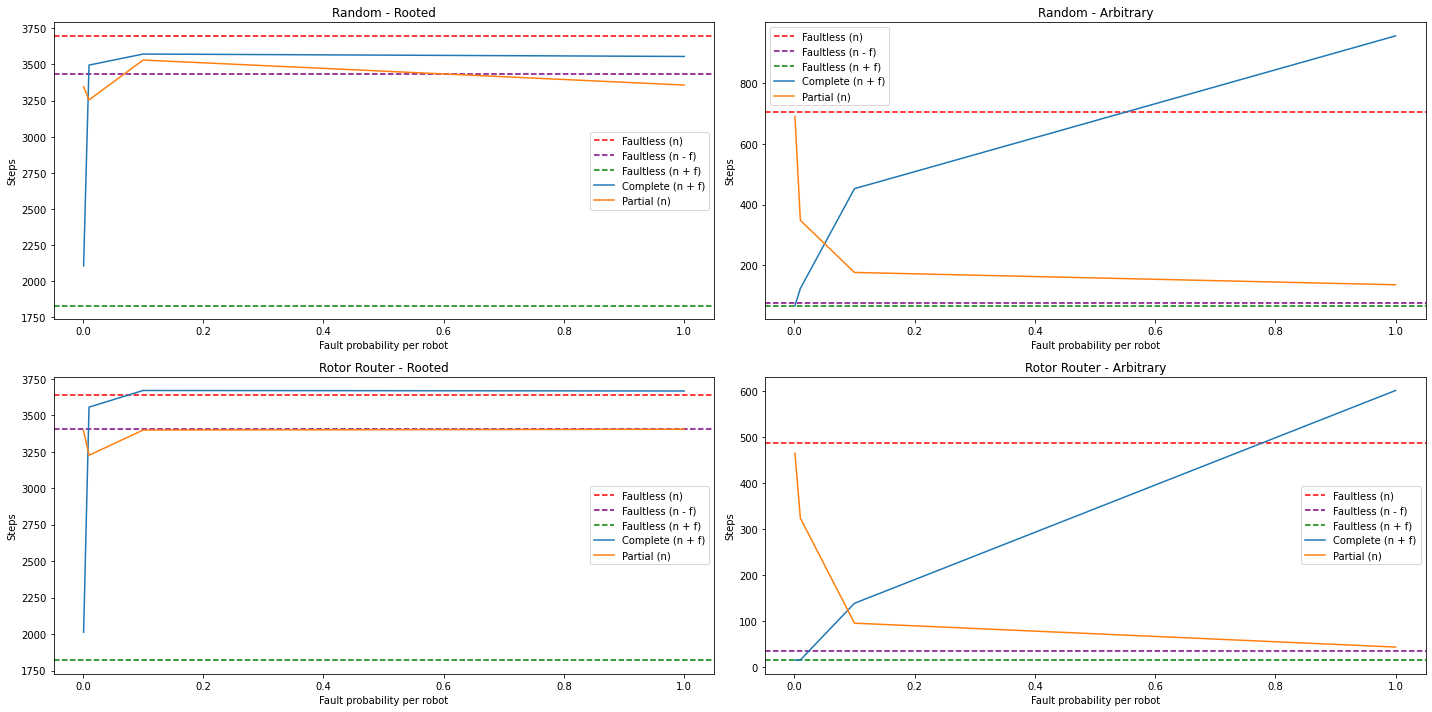

In [5]:
# BARBELL
barbell_rw_fl_r_normal = faultless[(faultless["algorithm_type"] == "RANDOM") & (faultless["graph_type"] == "BARBELL") & (faultless["teams"] == 1) & (faultless["nodes"] == faultless["robots"])]["steps"].mean()
barbell_rw_fl_r_plus = faultless[(faultless["algorithm_type"] == "RANDOM") & (faultless["graph_type"] == "BARBELL") & (faultless["teams"] == 1) & (faultless["nodes"] < faultless["robots"])]["steps"].mean()
barbell_rw_fl_r_minus = faultless[(faultless["algorithm_type"] == "RANDOM") & (faultless["graph_type"] == "BARBELL") & (faultless["teams"] == 1) & (faultless["nodes"] > faultless["robots"])]["steps"].mean()
barbell_rw_fy_c_r = faulty[(faulty["algorithm_type"] == "RANDOM") & (faulty["nodes"] < faulty["robots"]) & (faulty["graph_type"] == "BARBELL") & (faulty["teams"] == 1)].groupby("probability")["steps"].mean()
barbell_rw_fy_p_r = faulty[(faulty["algorithm_type"] == "RANDOM") & (faulty["nodes"] >= faulty["robots"]) & (faulty["graph_type"] == "BARBELL") & (faulty["teams"] == 1)].groupby("probability")["steps"].mean()

barbell_rw_fl_a_normal = faultless[(faultless["algorithm_type"] == "RANDOM") & (faultless["graph_type"] == "BARBELL") & (faultless["teams"] > 1) & (faultless["nodes"] == faultless["robots"])]["steps"].mean()
barbell_rw_fl_a_plus = faultless[(faultless["algorithm_type"] == "RANDOM") & (faultless["graph_type"] == "BARBELL") & (faultless["teams"] > 1) & (faultless["nodes"] < faultless["robots"])]["steps"].mean()
barbell_rw_fl_a_minus = faultless[(faultless["algorithm_type"] == "RANDOM") & (faultless["graph_type"] == "BARBELL") & (faultless["teams"] > 1) & (faultless["nodes"] > faultless["robots"])]["steps"].mean()
barbell_rw_fy_c_a = faulty[(faulty["algorithm_type"] == "RANDOM") & (faulty["nodes"] < faulty["robots"]) & (faulty["graph_type"] == "BARBELL") & (faulty["teams"] > 1)].groupby("probability")["steps"].mean()
barbell_rw_fy_p_a = faulty[(faulty["algorithm_type"] == "RANDOM") & (faulty["nodes"] >= faulty["robots"]) & (faulty["graph_type"] == "BARBELL") & (faulty["teams"] > 1)].groupby("probability")["steps"].mean()

barbell_rr_fl_r_normal = faultless[(faultless["algorithm_type"] == "ROTOR_ROUTER") & (faultless["graph_type"] == "BARBELL") & (faultless["teams"] == 1) & (faultless["nodes"] == faultless["robots"])]["steps"].mean()
barbell_rr_fl_r_plus = faultless[(faultless["algorithm_type"] == "ROTOR_ROUTER") & (faultless["graph_type"] == "BARBELL") & (faultless["teams"] == 1) & (faultless["nodes"] < faultless["robots"])]["steps"].mean()
barbell_rr_fl_r_minus = faultless[(faultless["algorithm_type"] == "ROTOR_ROUTER") & (faultless["graph_type"] == "BARBELL") & (faultless["teams"] == 1) & (faultless["nodes"] > faultless["robots"])]["steps"].mean()
barbell_rr_fy_c_r = faulty[(faulty["algorithm_type"] == "ROTOR_ROUTER") & (faulty["nodes"] < faulty["robots"]) & (faulty["graph_type"] == "BARBELL") & (faulty["teams"] == 1)].groupby("probability")["steps"].mean()
barbell_rr_fy_p_r = faulty[(faulty["algorithm_type"] == "ROTOR_ROUTER") & (faulty["nodes"] >= faulty["robots"]) & (faulty["graph_type"] == "BARBELL") & (faulty["teams"] == 1)].groupby("probability")["steps"].mean()

barbell_rr_fl_a_normal = faultless[(faultless["algorithm_type"] == "ROTOR_ROUTER") & (faultless["graph_type"] == "BARBELL") & (faultless["teams"] > 1) & (faultless["nodes"] == faultless["robots"])]["steps"].mean()
barbell_rr_fl_a_plus = faultless[(faultless["algorithm_type"] == "ROTOR_ROUTER") & (faultless["graph_type"] == "BARBELL") & (faultless["teams"] > 1) & (faultless["nodes"] < faultless["robots"])]["steps"].mean()
barbell_rr_fl_a_minus = faultless[(faultless["algorithm_type"] == "ROTOR_ROUTER") & (faultless["graph_type"] == "BARBELL") & (faultless["teams"] > 1) & (faultless["nodes"] > faultless["robots"])]["steps"].mean()
barbell_rr_fy_c_a = faulty[(faulty["algorithm_type"] == "ROTOR_ROUTER") & (faulty["nodes"] < faulty["robots"]) & (faulty["graph_type"] == "BARBELL") & (faulty["teams"] > 1)].groupby("probability")["steps"].mean()
barbell_rr_fy_p_a = faulty[(faulty["algorithm_type"] == "ROTOR_ROUTER") & (faulty["nodes"] >= faulty["robots"]) & (faulty["graph_type"] == "BARBELL") & (faulty["teams"] > 1)].groupby("probability")["steps"].mean()

# create a grid of plots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

# plot the data for the first chart
axs[0,0].axhline(y = barbell_rw_fl_r_normal, color="red", linestyle="--", label = "Faultless (n)")
axs[0,0].axhline(y = barbell_rw_fl_r_minus, color="purple", linestyle="--", label = "Faultless (n - f)")
axs[0,0].axhline(y = barbell_rw_fl_r_plus, color="green", linestyle="--", label = "Faultless (n + f)")
axs[0,0].plot(barbell_rw_fy_c_r.index, barbell_rw_fy_c_r.values, label = "Complete (n + f)")
axs[0,0].plot(barbell_rw_fy_p_r.index, barbell_rw_fy_p_r.values, label = "Partial (n)")
axs[0,0].set_xlabel("Fault probability per robot")
axs[0,0].set_ylabel("Steps")
axs[0,0].set_title('Random - Rooted')
axs[0,0].legend()

# plot the data for the second chart
axs[0,1].axhline(y = barbell_rw_fl_a_normal, color="red", linestyle="--", label = "Faultless (n)")
axs[0,1].axhline(y = barbell_rw_fl_a_minus, color="purple", linestyle="--", label = "Faultless (n - f)")
axs[0,1].axhline(y = barbell_rw_fl_a_plus, color="green", linestyle="--", label = "Faultless (n + f)")
axs[0,1].plot(barbell_rw_fy_c_a.index, barbell_rw_fy_c_a.values, label = "Complete (n + f)")
axs[0,1].plot(barbell_rw_fy_p_a.index, barbell_rw_fy_p_a.values, label = "Partial (n)")
axs[0,1].set_xlabel("Fault probability per robot")
axs[0,1].set_ylabel("Steps")
axs[0,1].set_title('Random - Arbitrary')
axs[0,1].legend()

# plot the data for the third chart
axs[1,0].axhline(y = barbell_rr_fl_r_normal, color="red", linestyle="--", label = "Faultless (n)")
axs[1,0].axhline(y = barbell_rr_fl_r_minus, color="purple", linestyle="--", label = "Faultless (n - f)")
axs[1,0].axhline(y = barbell_rr_fl_r_plus, color="green", linestyle="--", label = "Faultless (n + f)")
axs[1,0].plot(barbell_rr_fy_c_r.index, barbell_rr_fy_c_r.values, label = "Complete (n + f)")
axs[1,0].plot(barbell_rr_fy_p_r.index, barbell_rr_fy_p_r.values, label = "Partial (n)")
axs[1,0].set_xlabel("Fault probability per robot")
axs[1,0].set_ylabel("Steps")
axs[1,0].set_title('Rotor Router - Rooted')
axs[1,0].legend()

# plot the data for the fourth chart
axs[1,1].axhline(y = barbell_rr_fl_a_normal, color="red", linestyle="--", label = "Faultless (n)")
axs[1,1].axhline(y = barbell_rr_fl_a_minus, color="purple", linestyle="--", label = "Faultless (n - f)")
axs[1,1].axhline(y = barbell_rr_fl_a_plus, color="green", linestyle="--", label = "Faultless (n + f)")
axs[1,1].plot(barbell_rr_fy_c_a.index, barbell_rr_fy_c_a.values, label = "Complete (n + f)")
axs[1,1].plot(barbell_rr_fy_p_a.index, barbell_rr_fy_p_a.values, label = "Partial (n)")
axs[1,1].set_xlabel("Fault probability per robot")
axs[1,1].set_ylabel("Steps")
axs[1,1].set_title('Rotor Router - Arbitrary')
axs[1,1].legend()

# show the chart
plt.tight_layout()
plt.show()

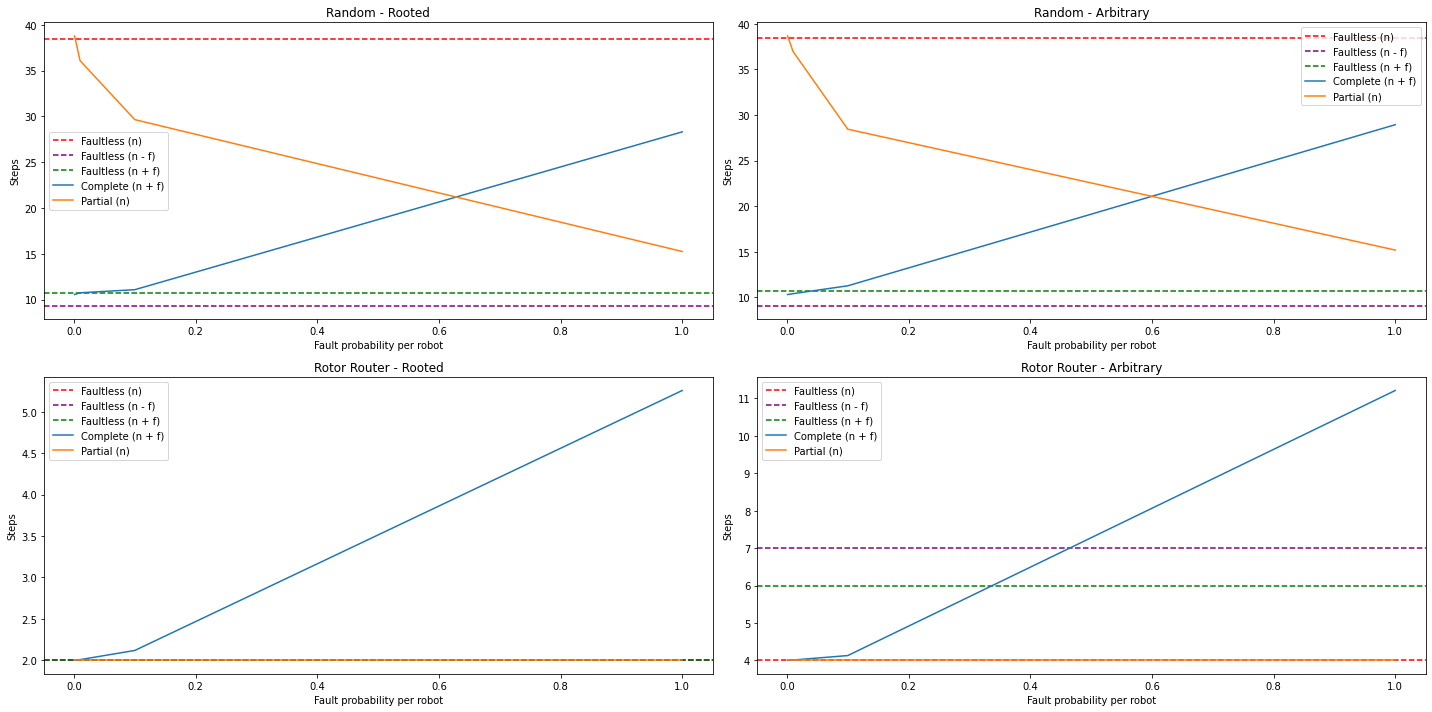

In [6]:
# COMPLETE
complete_rw_fl_r_normal = faultless[(faultless["algorithm_type"] == "RANDOM") & (faultless["graph_type"] == "COMPLETE") & (faultless["teams"] == 1) & (faultless["nodes"] == faultless["robots"])]["steps"].mean()
complete_rw_fl_r_plus = faultless[(faultless["algorithm_type"] == "RANDOM") & (faultless["graph_type"] == "COMPLETE") & (faultless["teams"] == 1) & (faultless["nodes"] < faultless["robots"])]["steps"].mean()
complete_rw_fl_r_minus = faultless[(faultless["algorithm_type"] == "RANDOM") & (faultless["graph_type"] == "COMPLETE") & (faultless["teams"] == 1) & (faultless["nodes"] > faultless["robots"])]["steps"].mean()
complete_rw_fy_c_r = faulty[(faulty["algorithm_type"] == "RANDOM") & (faulty["nodes"] < faulty["robots"]) & (faulty["graph_type"] == "COMPLETE") & (faulty["teams"] == 1)].groupby("probability")["steps"].mean()
complete_rw_fy_p_r = faulty[(faulty["algorithm_type"] == "RANDOM") & (faulty["nodes"] >= faulty["robots"]) & (faulty["graph_type"] == "COMPLETE") & (faulty["teams"] == 1)].groupby("probability")["steps"].mean()

complete_rw_fl_a_normal = faultless[(faultless["algorithm_type"] == "RANDOM") & (faultless["graph_type"] == "COMPLETE") & (faultless["teams"] > 1) & (faultless["nodes"] == faultless["robots"])]["steps"].mean()
complete_rw_fl_a_plus = faultless[(faultless["algorithm_type"] == "RANDOM") & (faultless["graph_type"] == "COMPLETE") & (faultless["teams"] > 1) & (faultless["nodes"] < faultless["robots"])]["steps"].mean()
complete_rw_fl_a_minus = faultless[(faultless["algorithm_type"] == "RANDOM") & (faultless["graph_type"] == "COMPLETE") & (faultless["teams"] > 1) & (faultless["nodes"] > faultless["robots"])]["steps"].mean()
complete_rw_fy_c_a = faulty[(faulty["algorithm_type"] == "RANDOM") & (faulty["nodes"] < faulty["robots"]) & (faulty["graph_type"] == "COMPLETE") & (faulty["teams"] > 1)].groupby("probability")["steps"].mean()
complete_rw_fy_p_a = faulty[(faulty["algorithm_type"] == "RANDOM") & (faulty["nodes"] >= faulty["robots"]) & (faulty["graph_type"] == "COMPLETE") & (faulty["teams"] > 1)].groupby("probability")["steps"].mean()

complete_rr_fl_r_normal = faultless[(faultless["algorithm_type"] == "ROTOR_ROUTER") & (faultless["graph_type"] == "COMPLETE") & (faultless["teams"] == 1) & (faultless["nodes"] == faultless["robots"])]["steps"].mean()
complete_rr_fl_r_plus = faultless[(faultless["algorithm_type"] == "ROTOR_ROUTER") & (faultless["graph_type"] == "COMPLETE") & (faultless["teams"] == 1) & (faultless["nodes"] < faultless["robots"])]["steps"].mean()
complete_rr_fl_r_minus = faultless[(faultless["algorithm_type"] == "ROTOR_ROUTER") & (faultless["graph_type"] == "COMPLETE") & (faultless["teams"] == 1) & (faultless["nodes"] > faultless["robots"])]["steps"].mean()
complete_rr_fy_c_r = faulty[(faulty["algorithm_type"] == "ROTOR_ROUTER") & (faulty["nodes"] < faulty["robots"]) & (faulty["graph_type"] == "COMPLETE") & (faulty["teams"] == 1)].groupby("probability")["steps"].mean()
complete_rr_fy_p_r = faulty[(faulty["algorithm_type"] == "ROTOR_ROUTER") & (faulty["nodes"] >= faulty["robots"]) & (faulty["graph_type"] == "COMPLETE") & (faulty["teams"] == 1)].groupby("probability")["steps"].mean()

complete_rr_fl_a_normal = faultless[(faultless["algorithm_type"] == "ROTOR_ROUTER") & (faultless["graph_type"] == "COMPLETE") & (faultless["teams"] > 1) & (faultless["nodes"] == faultless["robots"])]["steps"].mean()
complete_rr_fl_a_plus = faultless[(faultless["algorithm_type"] == "ROTOR_ROUTER") & (faultless["graph_type"] == "COMPLETE") & (faultless["teams"] > 1) & (faultless["nodes"] < faultless["robots"])]["steps"].mean()
complete_rr_fl_a_minus = faultless[(faultless["algorithm_type"] == "ROTOR_ROUTER") & (faultless["graph_type"] == "COMPLETE") & (faultless["teams"] > 1) & (faultless["nodes"] > faultless["robots"])]["steps"].mean()
complete_rr_fy_c_a = faulty[(faulty["algorithm_type"] == "ROTOR_ROUTER") & (faulty["nodes"] < faulty["robots"]) & (faulty["graph_type"] == "COMPLETE") & (faulty["teams"] > 1)].groupby("probability")["steps"].mean()
complete_rr_fy_p_a = faulty[(faulty["algorithm_type"] == "ROTOR_ROUTER") & (faulty["nodes"] >= faulty["robots"]) & (faulty["graph_type"] == "COMPLETE") & (faulty["teams"] > 1)].groupby("probability")["steps"].mean()

# create a grid of plots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

# plot the data for the first chart
axs[0,0].axhline(y = complete_rw_fl_r_normal, color="red", linestyle="--", label = "Faultless (n)")
axs[0,0].axhline(y = complete_rw_fl_r_minus, color="purple", linestyle="--", label = "Faultless (n - f)")
axs[0,0].axhline(y = complete_rw_fl_r_plus, color="green", linestyle="--", label = "Faultless (n + f)")
axs[0,0].plot(complete_rw_fy_c_r.index, complete_rw_fy_c_r.values, label = "Complete (n + f)")
axs[0,0].plot(complete_rw_fy_p_r.index, complete_rw_fy_p_r.values, label = "Partial (n)")
axs[0,0].set_xlabel("Fault probability per robot")
axs[0,0].set_ylabel("Steps")
axs[0,0].set_title('Random - Rooted')
axs[0,0].legend()

# plot the data for the second chart
axs[0,1].axhline(y = complete_rw_fl_a_normal, color="red", linestyle="--", label = "Faultless (n)")
axs[0,1].axhline(y = complete_rw_fl_a_minus, color="purple", linestyle="--", label = "Faultless (n - f)")
axs[0,1].axhline(y = complete_rw_fl_a_plus, color="green", linestyle="--", label = "Faultless (n + f)")
axs[0,1].plot(complete_rw_fy_c_a.index, complete_rw_fy_c_a.values, label = "Complete (n + f)")
axs[0,1].plot(complete_rw_fy_p_a.index, complete_rw_fy_p_a.values, label = "Partial (n)")
axs[0,1].set_xlabel("Fault probability per robot")
axs[0,1].set_ylabel("Steps")
axs[0,1].set_title('Random - Arbitrary')
axs[0,1].legend()

# plot the data for the third chart
axs[1,0].axhline(y = complete_rr_fl_r_normal, color="red", linestyle="--", label = "Faultless (n)")
axs[1,0].axhline(y = complete_rr_fl_r_minus, color="purple", linestyle="--", label = "Faultless (n - f)")
axs[1,0].axhline(y = complete_rr_fl_r_plus, color="green", linestyle="--", label = "Faultless (n + f)")
axs[1,0].plot(complete_rr_fy_c_r.index, complete_rr_fy_c_r.values, label = "Complete (n + f)")
axs[1,0].plot(complete_rr_fy_p_r.index, complete_rr_fy_p_r.values, label = "Partial (n)")
axs[1,0].set_xlabel("Fault probability per robot")
axs[1,0].set_ylabel("Steps")
axs[1,0].set_title('Rotor Router - Rooted')
axs[1,0].legend()

# plot the data for the fourth chart
axs[1,1].axhline(y = complete_rr_fl_a_normal, color="red", linestyle="--", label = "Faultless (n)")
axs[1,1].axhline(y = complete_rr_fl_a_minus, color="purple", linestyle="--", label = "Faultless (n - f)")
axs[1,1].axhline(y = complete_rr_fl_a_plus, color="green", linestyle="--", label = "Faultless (n + f)")
axs[1,1].plot(complete_rr_fy_c_a.index, complete_rr_fy_c_a.values, label = "Complete (n + f)")
axs[1,1].plot(complete_rr_fy_p_a.index, complete_rr_fy_p_a.values, label = "Partial (n)")
axs[1,1].set_xlabel("Fault probability per robot")
axs[1,1].set_ylabel("Steps")
axs[1,1].set_title('Rotor Router - Arbitrary')
axs[1,1].legend()

# show the chart
plt.tight_layout()
plt.show()

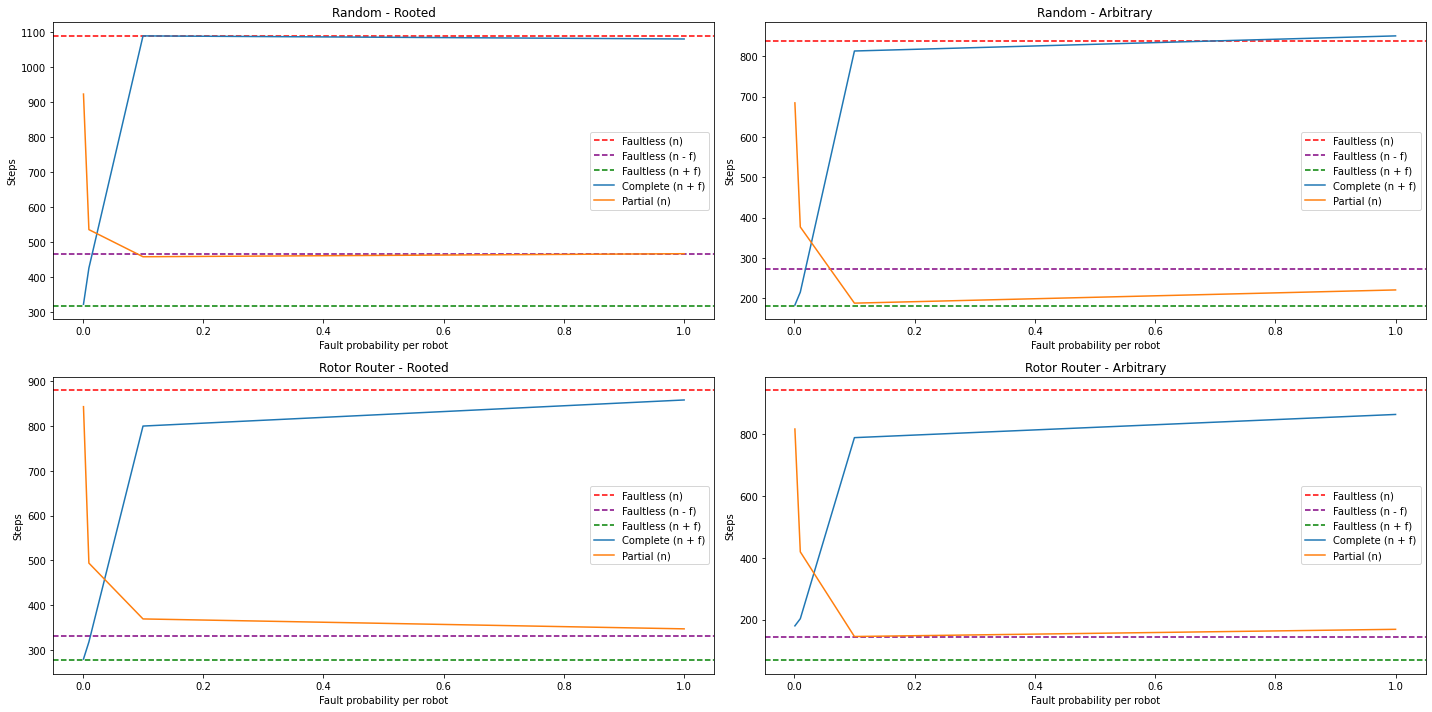

In [7]:
# GRID
grid_rw_fl_r_normal = faultless[(faultless["algorithm_type"] == "RANDOM") & (faultless["graph_type"] == "GRID") & (faultless["teams"] == 1) & (faultless["nodes"] == faultless["robots"])]["steps"].mean()
grid_rw_fl_r_plus = faultless[(faultless["algorithm_type"] == "RANDOM") & (faultless["graph_type"] == "GRID") & (faultless["teams"] == 1) & (faultless["nodes"] < faultless["robots"])]["steps"].mean()
grid_rw_fl_r_minus = faultless[(faultless["algorithm_type"] == "RANDOM") & (faultless["graph_type"] == "GRID") & (faultless["teams"] == 1) & (faultless["nodes"] > faultless["robots"])]["steps"].mean()
grid_rw_fy_c_r = faulty[(faulty["algorithm_type"] == "RANDOM") & (faulty["nodes"] < faulty["robots"]) & (faulty["graph_type"] == "GRID") & (faulty["teams"] == 1)].groupby("probability")["steps"].mean()
grid_rw_fy_p_r = faulty[(faulty["algorithm_type"] == "RANDOM") & (faulty["nodes"] >= faulty["robots"]) & (faulty["graph_type"] == "GRID") & (faulty["teams"] == 1)].groupby("probability")["steps"].mean()

grid_rw_fl_a_normal = faultless[(faultless["algorithm_type"] == "RANDOM") & (faultless["graph_type"] == "GRID") & (faultless["teams"] > 1) & (faultless["nodes"] == faultless["robots"])]["steps"].mean()
grid_rw_fl_a_plus = faultless[(faultless["algorithm_type"] == "RANDOM") & (faultless["graph_type"] == "GRID") & (faultless["teams"] > 1) & (faultless["nodes"] < faultless["robots"])]["steps"].mean()
grid_rw_fl_a_minus = faultless[(faultless["algorithm_type"] == "RANDOM") & (faultless["graph_type"] == "GRID") & (faultless["teams"] > 1) & (faultless["nodes"] > faultless["robots"])]["steps"].mean()
grid_rw_fy_c_a = faulty[(faulty["algorithm_type"] == "RANDOM") & (faulty["nodes"] < faulty["robots"]) & (faulty["graph_type"] == "GRID") & (faulty["teams"] > 1)].groupby("probability")["steps"].mean()
grid_rw_fy_p_a = faulty[(faulty["algorithm_type"] == "RANDOM") & (faulty["nodes"] >= faulty["robots"]) & (faulty["graph_type"] == "GRID") & (faulty["teams"] > 1)].groupby("probability")["steps"].mean()

grid_rr_fl_r_normal = faultless[(faultless["algorithm_type"] == "ROTOR_ROUTER") & (faultless["graph_type"] == "GRID") & (faultless["teams"] == 1) & (faultless["nodes"] == faultless["robots"])]["steps"].mean()
grid_rr_fl_r_plus = faultless[(faultless["algorithm_type"] == "ROTOR_ROUTER") & (faultless["graph_type"] == "GRID") & (faultless["teams"] == 1) & (faultless["nodes"] < faultless["robots"])]["steps"].mean()
grid_rr_fl_r_minus = faultless[(faultless["algorithm_type"] == "ROTOR_ROUTER") & (faultless["graph_type"] == "GRID") & (faultless["teams"] == 1) & (faultless["nodes"] > faultless["robots"])]["steps"].mean()
grid_rr_fy_c_r = faulty[(faulty["algorithm_type"] == "ROTOR_ROUTER") & (faulty["nodes"] < faulty["robots"]) & (faulty["graph_type"] == "GRID") & (faulty["teams"] == 1)].groupby("probability")["steps"].mean()
grid_rr_fy_p_r = faulty[(faulty["algorithm_type"] == "ROTOR_ROUTER") & (faulty["nodes"] >= faulty["robots"]) & (faulty["graph_type"] == "GRID") & (faulty["teams"] == 1)].groupby("probability")["steps"].mean()

grid_rr_fl_a_normal = faultless[(faultless["algorithm_type"] == "ROTOR_ROUTER") & (faultless["graph_type"] == "GRID") & (faultless["teams"] > 1) & (faultless["nodes"] == faultless["robots"])]["steps"].mean()
grid_rr_fl_a_plus = faultless[(faultless["algorithm_type"] == "ROTOR_ROUTER") & (faultless["graph_type"] == "GRID") & (faultless["teams"] > 1) & (faultless["nodes"] < faultless["robots"])]["steps"].mean()
grid_rr_fl_a_minus = faultless[(faultless["algorithm_type"] == "ROTOR_ROUTER") & (faultless["graph_type"] == "GRID") & (faultless["teams"] > 1) & (faultless["nodes"] > faultless["robots"])]["steps"].mean()
grid_rr_fy_c_a = faulty[(faulty["algorithm_type"] == "ROTOR_ROUTER") & (faulty["nodes"] < faulty["robots"]) & (faulty["graph_type"] == "GRID") & (faulty["teams"] > 1)].groupby("probability")["steps"].mean()
grid_rr_fy_p_a = faulty[(faulty["algorithm_type"] == "ROTOR_ROUTER") & (faulty["nodes"] >= faulty["robots"]) & (faulty["graph_type"] == "GRID") & (faulty["teams"] > 1)].groupby("probability")["steps"].mean()

# create a grid of plots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

# plot the data for the first chart
axs[0,0].axhline(y = grid_rw_fl_r_normal, color="red", linestyle="--", label = "Faultless (n)")
axs[0,0].axhline(y = grid_rw_fl_r_minus, color="purple", linestyle="--", label = "Faultless (n - f)")
axs[0,0].axhline(y = grid_rw_fl_r_plus, color="green", linestyle="--", label = "Faultless (n + f)")
axs[0,0].plot(grid_rw_fy_c_r.index, grid_rw_fy_c_r.values, label = "Complete (n + f)")
axs[0,0].plot(grid_rw_fy_p_r.index, grid_rw_fy_p_r.values, label = "Partial (n)")
axs[0,0].set_xlabel("Fault probability per robot")
axs[0,0].set_ylabel("Steps")
axs[0,0].set_title('Random - Rooted')
axs[0,0].legend()

# plot the data for the second chart
axs[0,1].axhline(y = grid_rw_fl_a_normal, color="red", linestyle="--", label = "Faultless (n)")
axs[0,1].axhline(y = grid_rw_fl_a_minus, color="purple", linestyle="--", label = "Faultless (n - f)")
axs[0,1].axhline(y = grid_rw_fl_a_plus, color="green", linestyle="--", label = "Faultless (n + f)")
axs[0,1].plot(grid_rw_fy_c_a.index, grid_rw_fy_c_a.values, label = "Complete (n + f)")
axs[0,1].plot(grid_rw_fy_p_a.index, grid_rw_fy_p_a.values, label = "Partial (n)")
axs[0,1].set_xlabel("Fault probability per robot")
axs[0,1].set_ylabel("Steps")
axs[0,1].set_title('Random - Arbitrary')
axs[0,1].legend()

# plot the data for the third chart
axs[1,0].axhline(y = grid_rr_fl_r_normal, color="red", linestyle="--", label = "Faultless (n)")
axs[1,0].axhline(y = grid_rr_fl_r_minus, color="purple", linestyle="--", label = "Faultless (n - f)")
axs[1,0].axhline(y = grid_rr_fl_r_plus, color="green", linestyle="--", label = "Faultless (n + f)")
axs[1,0].plot(grid_rr_fy_c_r.index, grid_rr_fy_c_r.values, label = "Complete (n + f)")
axs[1,0].plot(grid_rr_fy_p_r.index, grid_rr_fy_p_r.values, label = "Partial (n)")
axs[1,0].set_xlabel("Fault probability per robot")
axs[1,0].set_ylabel("Steps")
axs[1,0].set_title('Rotor Router - Rooted')
axs[1,0].legend()

# plot the data for the fourth chart
axs[1,1].axhline(y = grid_rr_fl_a_normal, color="red", linestyle="--", label = "Faultless (n)")
axs[1,1].axhline(y = grid_rr_fl_a_minus, color="purple", linestyle="--", label = "Faultless (n - f)")
axs[1,1].axhline(y = grid_rr_fl_a_plus, color="green", linestyle="--", label = "Faultless (n + f)")
axs[1,1].plot(grid_rr_fy_c_a.index, grid_rr_fy_c_a.values, label = "Complete (n + f)")
axs[1,1].plot(grid_rr_fy_p_a.index, grid_rr_fy_p_a.values, label = "Partial (n)")
axs[1,1].set_xlabel("Fault probability per robot")
axs[1,1].set_ylabel("Steps")
axs[1,1].set_title('Rotor Router - Arbitrary')
axs[1,1].legend()

# show the chart
plt.tight_layout()
plt.show()

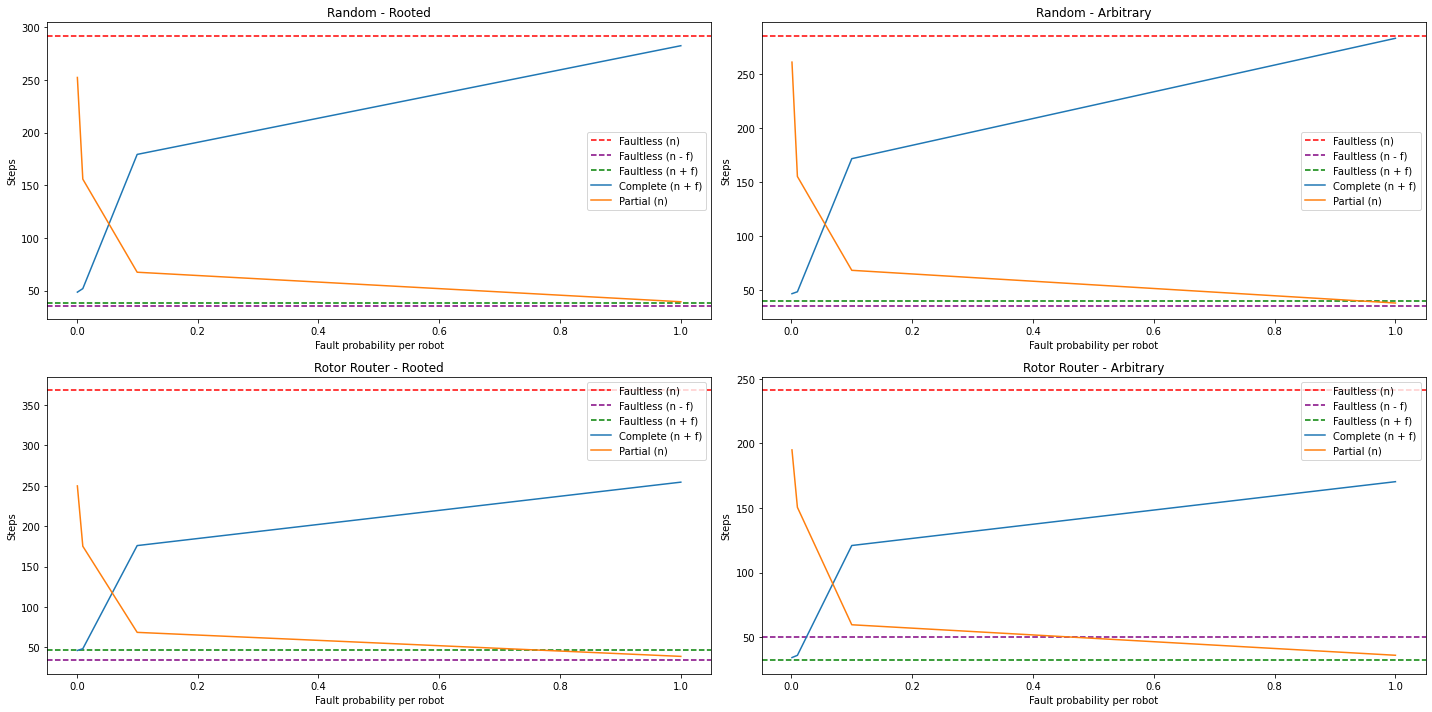

In [8]:
# RANDOM
random_rw_fl_r_normal = faultless[(faultless["algorithm_type"] == "RANDOM") & (faultless["graph_type"] == "RANDOM") & (faultless["teams"] == 1) & (faultless["nodes"] == faultless["robots"])]["steps"].mean()
random_rw_fl_r_plus = faultless[(faultless["algorithm_type"] == "RANDOM") & (faultless["graph_type"] == "RANDOM") & (faultless["teams"] == 1) & (faultless["nodes"] < faultless["robots"])]["steps"].mean()
random_rw_fl_r_minus = faultless[(faultless["algorithm_type"] == "RANDOM") & (faultless["graph_type"] == "RANDOM") & (faultless["teams"] == 1) & (faultless["nodes"] > faultless["robots"])]["steps"].mean()
random_rw_fy_c_r = faulty[(faulty["algorithm_type"] == "RANDOM") & (faulty["nodes"] < faulty["robots"]) & (faulty["graph_type"] == "RANDOM") & (faulty["teams"] == 1)].groupby("probability")["steps"].mean()
random_rw_fy_p_r = faulty[(faulty["algorithm_type"] == "RANDOM") & (faulty["nodes"] >= faulty["robots"]) & (faulty["graph_type"] == "RANDOM") & (faulty["teams"] == 1)].groupby("probability")["steps"].mean()

random_rw_fl_a_normal = faultless[(faultless["algorithm_type"] == "RANDOM") & (faultless["graph_type"] == "RANDOM") & (faultless["teams"] > 1) & (faultless["nodes"] == faultless["robots"])]["steps"].mean()
random_rw_fl_a_plus = faultless[(faultless["algorithm_type"] == "RANDOM") & (faultless["graph_type"] == "RANDOM") & (faultless["teams"] > 1) & (faultless["nodes"] < faultless["robots"])]["steps"].mean()
random_rw_fl_a_minus = faultless[(faultless["algorithm_type"] == "RANDOM") & (faultless["graph_type"] == "RANDOM") & (faultless["teams"] > 1) & (faultless["nodes"] > faultless["robots"])]["steps"].mean()
random_rw_fy_c_a = faulty[(faulty["algorithm_type"] == "RANDOM") & (faulty["nodes"] < faulty["robots"]) & (faulty["graph_type"] == "RANDOM") & (faulty["teams"] > 1)].groupby("probability")["steps"].mean()
random_rw_fy_p_a = faulty[(faulty["algorithm_type"] == "RANDOM") & (faulty["nodes"] >= faulty["robots"]) & (faulty["graph_type"] == "RANDOM") & (faulty["teams"] > 1)].groupby("probability")["steps"].mean()

random_rr_fl_r_normal = faultless[(faultless["algorithm_type"] == "ROTOR_ROUTER") & (faultless["graph_type"] == "RANDOM") & (faultless["teams"] == 1) & (faultless["nodes"] == faultless["robots"])]["steps"].mean()
random_rr_fl_r_plus = faultless[(faultless["algorithm_type"] == "ROTOR_ROUTER") & (faultless["graph_type"] == "RANDOM") & (faultless["teams"] == 1) & (faultless["nodes"] < faultless["robots"])]["steps"].mean()
random_rr_fl_r_minus = faultless[(faultless["algorithm_type"] == "ROTOR_ROUTER") & (faultless["graph_type"] == "RANDOM") & (faultless["teams"] == 1) & (faultless["nodes"] > faultless["robots"])]["steps"].mean()
random_rr_fy_c_r = faulty[(faulty["algorithm_type"] == "ROTOR_ROUTER") & (faulty["nodes"] < faulty["robots"]) & (faulty["graph_type"] == "RANDOM") & (faulty["teams"] == 1)].groupby("probability")["steps"].mean()
random_rr_fy_p_r = faulty[(faulty["algorithm_type"] == "ROTOR_ROUTER") & (faulty["nodes"] >= faulty["robots"]) & (faulty["graph_type"] == "RANDOM") & (faulty["teams"] == 1)].groupby("probability")["steps"].mean()

random_rr_fl_a_normal = faultless[(faultless["algorithm_type"] == "ROTOR_ROUTER") & (faultless["graph_type"] == "RANDOM") & (faultless["teams"] > 1) & (faultless["nodes"] == faultless["robots"])]["steps"].mean()
random_rr_fl_a_plus = faultless[(faultless["algorithm_type"] == "ROTOR_ROUTER") & (faultless["graph_type"] == "RANDOM") & (faultless["teams"] > 1) & (faultless["nodes"] < faultless["robots"])]["steps"].mean()
random_rr_fl_a_minus = faultless[(faultless["algorithm_type"] == "ROTOR_ROUTER") & (faultless["graph_type"] == "RANDOM") & (faultless["teams"] > 1) & (faultless["nodes"] > faultless["robots"])]["steps"].mean()
random_rr_fy_c_a = faulty[(faulty["algorithm_type"] == "ROTOR_ROUTER") & (faulty["nodes"] < faulty["robots"]) & (faulty["graph_type"] == "RANDOM") & (faulty["teams"] > 1)].groupby("probability")["steps"].mean()
random_rr_fy_p_a = faulty[(faulty["algorithm_type"] == "ROTOR_ROUTER") & (faulty["nodes"] >= faulty["robots"]) & (faulty["graph_type"] == "RANDOM") & (faulty["teams"] > 1)].groupby("probability")["steps"].mean()

# create a random of plots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

# plot the data for the first chart
axs[0,0].axhline(y = random_rw_fl_r_normal, color="red", linestyle="--", label = "Faultless (n)")
axs[0,0].axhline(y = random_rw_fl_r_minus, color="purple", linestyle="--", label = "Faultless (n - f)")
axs[0,0].axhline(y = random_rw_fl_r_plus, color="green", linestyle="--", label = "Faultless (n + f)")
axs[0,0].plot(random_rw_fy_c_r.index, random_rw_fy_c_r.values, label = "Complete (n + f)")
axs[0,0].plot(random_rw_fy_p_r.index, random_rw_fy_p_r.values, label = "Partial (n)")
axs[0,0].set_xlabel("Fault probability per robot")
axs[0,0].set_ylabel("Steps")
axs[0,0].set_title('Random - Rooted')
axs[0,0].legend()

# plot the data for the second chart
axs[0,1].axhline(y = random_rw_fl_a_normal, color="red", linestyle="--", label = "Faultless (n)")
axs[0,1].axhline(y = random_rw_fl_a_minus, color="purple", linestyle="--", label = "Faultless (n - f)")
axs[0,1].axhline(y = random_rw_fl_a_plus, color="green", linestyle="--", label = "Faultless (n + f)")
axs[0,1].plot(random_rw_fy_c_a.index, random_rw_fy_c_a.values, label = "Complete (n + f)")
axs[0,1].plot(random_rw_fy_p_a.index, random_rw_fy_p_a.values, label = "Partial (n)")
axs[0,1].set_xlabel("Fault probability per robot")
axs[0,1].set_ylabel("Steps")
axs[0,1].set_title('Random - Arbitrary')
axs[0,1].legend()

# plot the data for the third chart
axs[1,0].axhline(y = random_rr_fl_r_normal, color="red", linestyle="--", label = "Faultless (n)")
axs[1,0].axhline(y = random_rr_fl_r_minus, color="purple", linestyle="--", label = "Faultless (n - f)")
axs[1,0].axhline(y = random_rr_fl_r_plus, color="green", linestyle="--", label = "Faultless (n + f)")
axs[1,0].plot(random_rr_fy_c_r.index, random_rr_fy_c_r.values, label = "Complete (n + f)")
axs[1,0].plot(random_rr_fy_p_r.index, random_rr_fy_p_r.values, label = "Partial (n)")
axs[1,0].set_xlabel("Fault probability per robot")
axs[1,0].set_ylabel("Steps")
axs[1,0].set_title('Rotor Router - Rooted')
axs[1,0].legend()

# plot the data for the fourth chart
axs[1,1].axhline(y = random_rr_fl_a_normal, color="red", linestyle="--", label = "Faultless (n)")
axs[1,1].axhline(y = random_rr_fl_a_minus, color="purple", linestyle="--", label = "Faultless (n - f)")
axs[1,1].axhline(y = random_rr_fl_a_plus, color="green", linestyle="--", label = "Faultless (n + f)")
axs[1,1].plot(random_rr_fy_c_a.index, random_rr_fy_c_a.values, label = "Complete (n + f)")
axs[1,1].plot(random_rr_fy_p_a.index, random_rr_fy_p_a.values, label = "Partial (n)")
axs[1,1].set_xlabel("Fault probability per robot")
axs[1,1].set_ylabel("Steps")
axs[1,1].set_title('Rotor Router - Arbitrary')
axs[1,1].legend()

# show the chart
plt.tight_layout()
plt.show()

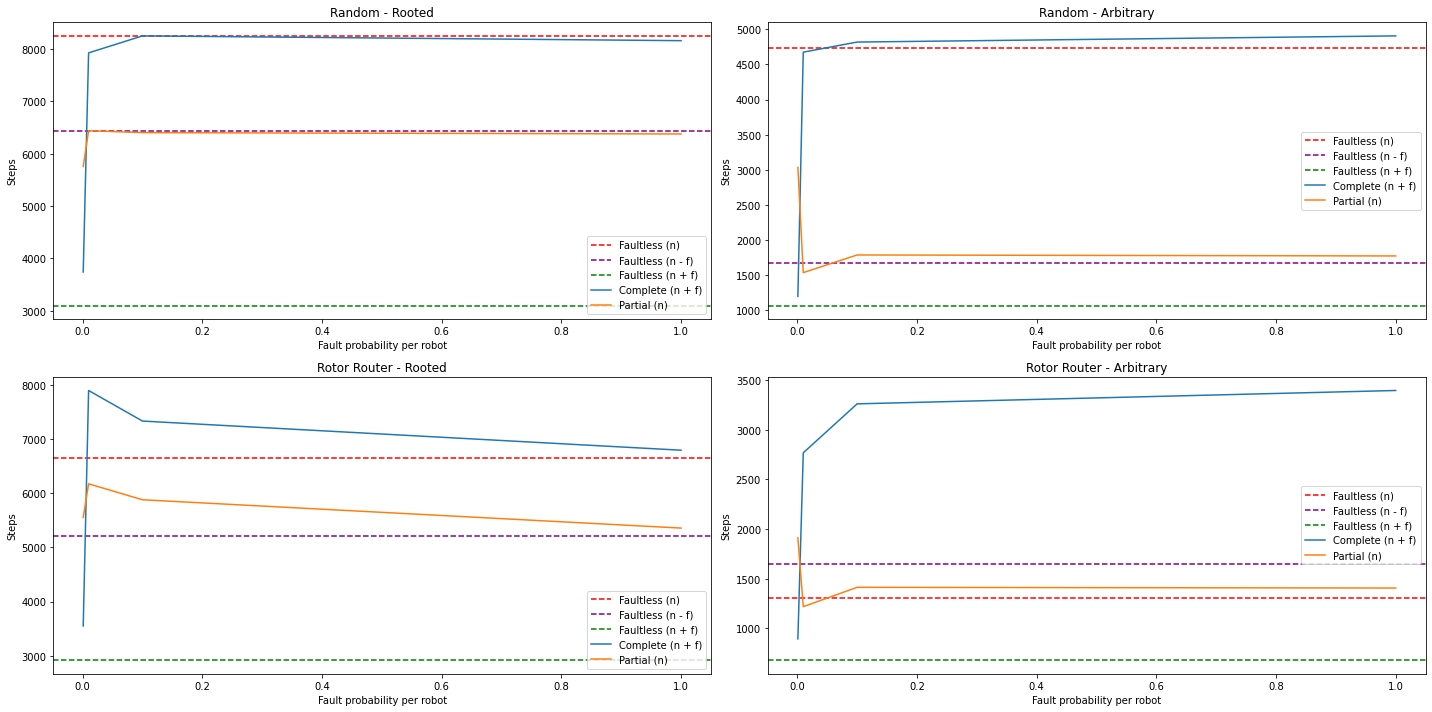

In [10]:
# RING
ring_rw_fl_r_normal = faultless[(faultless["algorithm_type"] == "RANDOM") & (faultless["graph_type"] == "RING") & (faultless["teams"] == 1) & (faultless["nodes"] == faultless["robots"])]["steps"].mean()
ring_rw_fl_r_plus = faultless[(faultless["algorithm_type"] == "RANDOM") & (faultless["graph_type"] == "RING") & (faultless["teams"] == 1) & (faultless["nodes"] < faultless["robots"])]["steps"].mean()
ring_rw_fl_r_minus = faultless[(faultless["algorithm_type"] == "RANDOM") & (faultless["graph_type"] == "RING") & (faultless["teams"] == 1) & (faultless["nodes"] > faultless["robots"])]["steps"].mean()
ring_rw_fy_c_r = faulty[(faulty["algorithm_type"] == "RANDOM") & (faulty["nodes"] < faulty["robots"]) & (faulty["graph_type"] == "RING") & (faulty["teams"] == 1)].groupby("probability")["steps"].mean()
ring_rw_fy_p_r = faulty[(faulty["algorithm_type"] == "RANDOM") & (faulty["nodes"] >= faulty["robots"]) & (faulty["graph_type"] == "RING") & (faulty["teams"] == 1)].groupby("probability")["steps"].mean()

ring_rw_fl_a_normal = faultless[(faultless["algorithm_type"] == "RANDOM") & (faultless["graph_type"] == "RING") & (faultless["teams"] > 1) & (faultless["nodes"] == faultless["robots"])]["steps"].mean()
ring_rw_fl_a_plus = faultless[(faultless["algorithm_type"] == "RANDOM") & (faultless["graph_type"] == "RING") & (faultless["teams"] > 1) & (faultless["nodes"] < faultless["robots"])]["steps"].mean()
ring_rw_fl_a_minus = faultless[(faultless["algorithm_type"] == "RANDOM") & (faultless["graph_type"] == "RING") & (faultless["teams"] > 1) & (faultless["nodes"] > faultless["robots"])]["steps"].mean()
ring_rw_fy_c_a = faulty[(faulty["algorithm_type"] == "RANDOM") & (faulty["nodes"] < faulty["robots"]) & (faulty["graph_type"] == "RING") & (faulty["teams"] > 1)].groupby("probability")["steps"].mean()
ring_rw_fy_p_a = faulty[(faulty["algorithm_type"] == "RANDOM") & (faulty["nodes"] >= faulty["robots"]) & (faulty["graph_type"] == "RING") & (faulty["teams"] > 1)].groupby("probability")["steps"].mean()

ring_rr_fl_r_normal = faultless[(faultless["algorithm_type"] == "ROTOR_ROUTER") & (faultless["graph_type"] == "RING") & (faultless["teams"] == 1) & (faultless["nodes"] == faultless["robots"])]["steps"].mean()
ring_rr_fl_r_plus = faultless[(faultless["algorithm_type"] == "ROTOR_ROUTER") & (faultless["graph_type"] == "RING") & (faultless["teams"] == 1) & (faultless["nodes"] < faultless["robots"])]["steps"].mean()
ring_rr_fl_r_minus = faultless[(faultless["algorithm_type"] == "ROTOR_ROUTER") & (faultless["graph_type"] == "RING") & (faultless["teams"] == 1) & (faultless["nodes"] > faultless["robots"])]["steps"].mean()
ring_rr_fy_c_r = faulty[(faulty["algorithm_type"] == "ROTOR_ROUTER") & (faulty["nodes"] < faulty["robots"]) & (faulty["graph_type"] == "RING") & (faulty["teams"] == 1)].groupby("probability")["steps"].mean()
ring_rr_fy_p_r = faulty[(faulty["algorithm_type"] == "ROTOR_ROUTER") & (faulty["nodes"] >= faulty["robots"]) & (faulty["graph_type"] == "RING") & (faulty["teams"] == 1)].groupby("probability")["steps"].mean()

ring_rr_fl_a_normal = faultless[(faultless["algorithm_type"] == "ROTOR_ROUTER") & (faultless["graph_type"] == "RING") & (faultless["teams"] > 1) & (faultless["nodes"] == faultless["robots"])]["steps"].mean()
ring_rr_fl_a_plus = faultless[(faultless["algorithm_type"] == "ROTOR_ROUTER") & (faultless["graph_type"] == "RING") & (faultless["teams"] > 1) & (faultless["nodes"] < faultless["robots"])]["steps"].mean()
ring_rr_fl_a_minus = faultless[(faultless["algorithm_type"] == "ROTOR_ROUTER") & (faultless["graph_type"] == "RING") & (faultless["teams"] > 1) & (faultless["nodes"] > faultless["robots"])]["steps"].mean()
ring_rr_fy_c_a = faulty[(faulty["algorithm_type"] == "ROTOR_ROUTER") & (faulty["nodes"] < faulty["robots"]) & (faulty["graph_type"] == "RING") & (faulty["teams"] > 1)].groupby("probability")["steps"].mean()
ring_rr_fy_p_a = faulty[(faulty["algorithm_type"] == "ROTOR_ROUTER") & (faulty["nodes"] >= faulty["robots"]) & (faulty["graph_type"] == "RING") & (faulty["teams"] > 1)].groupby("probability")["steps"].mean()

# create a ring of plots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

# plot the data for the first chart
axs[0,0].axhline(y = ring_rw_fl_r_normal, color="red", linestyle="--", label = "Faultless (n)")
axs[0,0].axhline(y = ring_rw_fl_r_minus, color="purple", linestyle="--", label = "Faultless (n - f)")
axs[0,0].axhline(y = ring_rw_fl_r_plus, color="green", linestyle="--", label = "Faultless (n + f)")
axs[0,0].plot(ring_rw_fy_c_r.index, ring_rw_fy_c_r.values, label = "Complete (n + f)")
axs[0,0].plot(ring_rw_fy_p_r.index, ring_rw_fy_p_r.values, label = "Partial (n)")
axs[0,0].set_xlabel("Fault probability per robot")
axs[0,0].set_ylabel("Steps")
axs[0,0].set_title('Random - Rooted')
axs[0,0].legend()

# plot the data for the second chart
axs[0,1].axhline(y = ring_rw_fl_a_normal, color="red", linestyle="--", label = "Faultless (n)")
axs[0,1].axhline(y = ring_rw_fl_a_minus, color="purple", linestyle="--", label = "Faultless (n - f)")
axs[0,1].axhline(y = ring_rw_fl_a_plus, color="green", linestyle="--", label = "Faultless (n + f)")
axs[0,1].plot(ring_rw_fy_c_a.index, ring_rw_fy_c_a.values, label = "Complete (n + f)")
axs[0,1].plot(ring_rw_fy_p_a.index, ring_rw_fy_p_a.values, label = "Partial (n)")
axs[0,1].set_xlabel("Fault probability per robot")
axs[0,1].set_ylabel("Steps")
axs[0,1].set_title('Random - Arbitrary')
axs[0,1].legend()

# plot the data for the third chart
axs[1,0].axhline(y = ring_rr_fl_r_normal, color="red", linestyle="--", label = "Faultless (n)")
axs[1,0].axhline(y = ring_rr_fl_r_minus, color="purple", linestyle="--", label = "Faultless (n - f)")
axs[1,0].axhline(y = ring_rr_fl_r_plus, color="green", linestyle="--", label = "Faultless (n + f)")
axs[1,0].plot(ring_rr_fy_c_r.index, ring_rr_fy_c_r.values, label = "Complete (n + f)")
axs[1,0].plot(ring_rr_fy_p_r.index, ring_rr_fy_p_r.values, label = "Partial (n)")
axs[1,0].set_xlabel("Fault probability per robot")
axs[1,0].set_ylabel("Steps")
axs[1,0].set_title('Rotor Router - Rooted')
axs[1,0].legend()

# plot the data for the fourth chart
axs[1,1].axhline(y = ring_rr_fl_a_normal, color="red", linestyle="--", label = "Faultless (n)")
axs[1,1].axhline(y = ring_rr_fl_a_minus, color="purple", linestyle="--", label = "Faultless (n - f)")
axs[1,1].axhline(y = ring_rr_fl_a_plus, color="green", linestyle="--", label = "Faultless (n + f)")
axs[1,1].plot(ring_rr_fy_c_a.index, ring_rr_fy_c_a.values, label = "Complete (n + f)")
axs[1,1].plot(ring_rr_fy_p_a.index, ring_rr_fy_p_a.values, label = "Partial (n)")
axs[1,1].set_xlabel("Fault probability per robot")
axs[1,1].set_ylabel("Steps")
axs[1,1].set_title('Rotor Router - Arbitrary')
axs[1,1].legend()

# show the chart
plt.tight_layout()
plt.show()

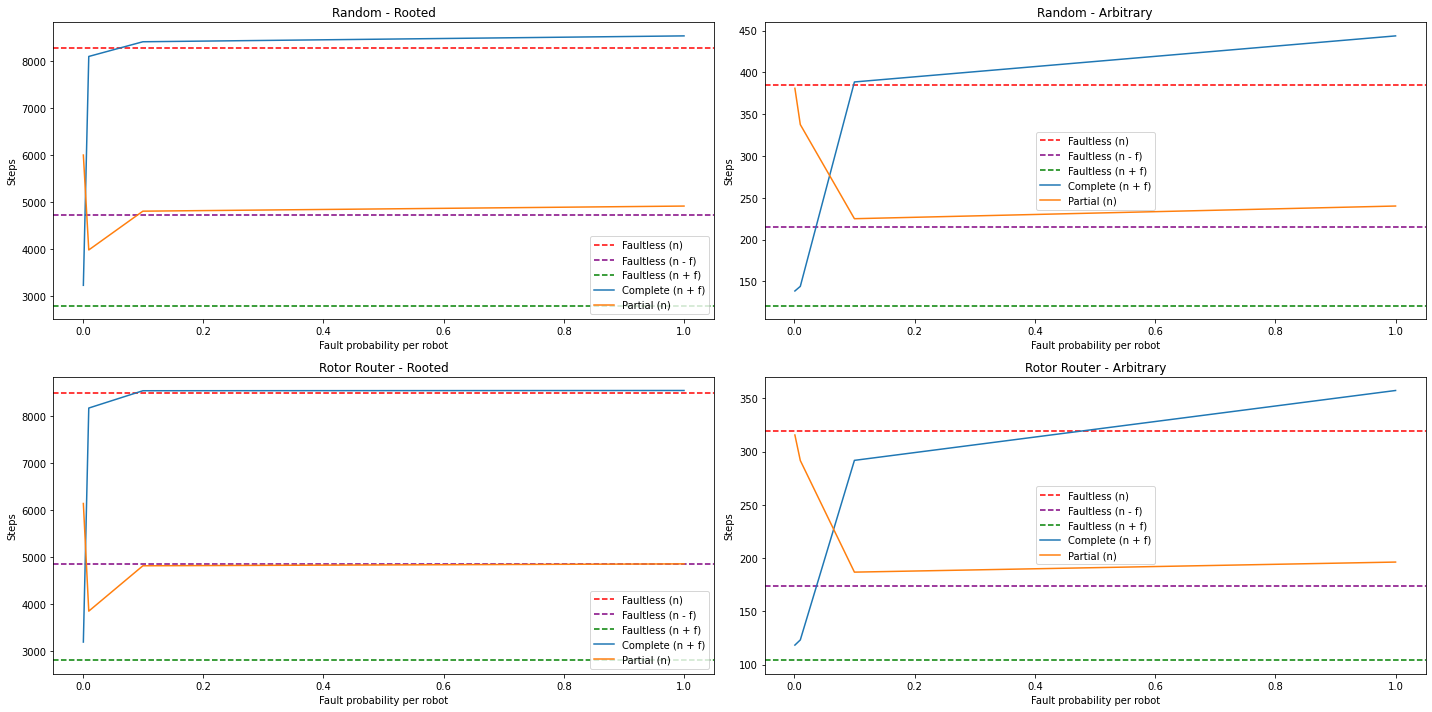

In [11]:
# LOLLIPOP
lollipop_rw_fl_r_normal = faultless[(faultless["algorithm_type"] == "RANDOM") & (faultless["graph_type"] == "LOLLIPOP") & (faultless["teams"] == 1) & (faultless["nodes"] == faultless["robots"])]["steps"].mean()
lollipop_rw_fl_r_plus = faultless[(faultless["algorithm_type"] == "RANDOM") & (faultless["graph_type"] == "LOLLIPOP") & (faultless["teams"] == 1) & (faultless["nodes"] < faultless["robots"])]["steps"].mean()
lollipop_rw_fl_r_minus = faultless[(faultless["algorithm_type"] == "RANDOM") & (faultless["graph_type"] == "LOLLIPOP") & (faultless["teams"] == 1) & (faultless["nodes"] > faultless["robots"])]["steps"].mean()
lollipop_rw_fy_c_r = faulty[(faulty["algorithm_type"] == "RANDOM") & (faulty["nodes"] < faulty["robots"]) & (faulty["graph_type"] == "LOLLIPOP") & (faulty["teams"] == 1)].groupby("probability")["steps"].mean()
lollipop_rw_fy_p_r = faulty[(faulty["algorithm_type"] == "RANDOM") & (faulty["nodes"] >= faulty["robots"]) & (faulty["graph_type"] == "LOLLIPOP") & (faulty["teams"] == 1)].groupby("probability")["steps"].mean()

lollipop_rw_fl_a_normal = faultless[(faultless["algorithm_type"] == "RANDOM") & (faultless["graph_type"] == "LOLLIPOP") & (faultless["teams"] > 1) & (faultless["nodes"] == faultless["robots"])]["steps"].mean()
lollipop_rw_fl_a_plus = faultless[(faultless["algorithm_type"] == "RANDOM") & (faultless["graph_type"] == "LOLLIPOP") & (faultless["teams"] > 1) & (faultless["nodes"] < faultless["robots"])]["steps"].mean()
lollipop_rw_fl_a_minus = faultless[(faultless["algorithm_type"] == "RANDOM") & (faultless["graph_type"] == "LOLLIPOP") & (faultless["teams"] > 1) & (faultless["nodes"] > faultless["robots"])]["steps"].mean()
lollipop_rw_fy_c_a = faulty[(faulty["algorithm_type"] == "RANDOM") & (faulty["nodes"] < faulty["robots"]) & (faulty["graph_type"] == "LOLLIPOP") & (faulty["teams"] > 1)].groupby("probability")["steps"].mean()
lollipop_rw_fy_p_a = faulty[(faulty["algorithm_type"] == "RANDOM") & (faulty["nodes"] >= faulty["robots"]) & (faulty["graph_type"] == "LOLLIPOP") & (faulty["teams"] > 1)].groupby("probability")["steps"].mean()

lollipop_rr_fl_r_normal = faultless[(faultless["algorithm_type"] == "ROTOR_ROUTER") & (faultless["graph_type"] == "LOLLIPOP") & (faultless["teams"] == 1) & (faultless["nodes"] == faultless["robots"])]["steps"].mean()
lollipop_rr_fl_r_plus = faultless[(faultless["algorithm_type"] == "ROTOR_ROUTER") & (faultless["graph_type"] == "LOLLIPOP") & (faultless["teams"] == 1) & (faultless["nodes"] < faultless["robots"])]["steps"].mean()
lollipop_rr_fl_r_minus = faultless[(faultless["algorithm_type"] == "ROTOR_ROUTER") & (faultless["graph_type"] == "LOLLIPOP") & (faultless["teams"] == 1) & (faultless["nodes"] > faultless["robots"])]["steps"].mean()
lollipop_rr_fy_c_r = faulty[(faulty["algorithm_type"] == "ROTOR_ROUTER") & (faulty["nodes"] < faulty["robots"]) & (faulty["graph_type"] == "LOLLIPOP") & (faulty["teams"] == 1)].groupby("probability")["steps"].mean()
lollipop_rr_fy_p_r = faulty[(faulty["algorithm_type"] == "ROTOR_ROUTER") & (faulty["nodes"] >= faulty["robots"]) & (faulty["graph_type"] == "LOLLIPOP") & (faulty["teams"] == 1)].groupby("probability")["steps"].mean()

lollipop_rr_fl_a_normal = faultless[(faultless["algorithm_type"] == "ROTOR_ROUTER") & (faultless["graph_type"] == "LOLLIPOP") & (faultless["teams"] > 1) & (faultless["nodes"] == faultless["robots"])]["steps"].mean()
lollipop_rr_fl_a_plus = faultless[(faultless["algorithm_type"] == "ROTOR_ROUTER") & (faultless["graph_type"] == "LOLLIPOP") & (faultless["teams"] > 1) & (faultless["nodes"] < faultless["robots"])]["steps"].mean()
lollipop_rr_fl_a_minus = faultless[(faultless["algorithm_type"] == "ROTOR_ROUTER") & (faultless["graph_type"] == "LOLLIPOP") & (faultless["teams"] > 1) & (faultless["nodes"] > faultless["robots"])]["steps"].mean()
lollipop_rr_fy_c_a = faulty[(faulty["algorithm_type"] == "ROTOR_ROUTER") & (faulty["nodes"] < faulty["robots"]) & (faulty["graph_type"] == "LOLLIPOP") & (faulty["teams"] > 1)].groupby("probability")["steps"].mean()
lollipop_rr_fy_p_a = faulty[(faulty["algorithm_type"] == "ROTOR_ROUTER") & (faulty["nodes"] >= faulty["robots"]) & (faulty["graph_type"] == "LOLLIPOP") & (faulty["teams"] > 1)].groupby("probability")["steps"].mean()

# create a lollipop of plots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

# plot the data for the first chart
axs[0,0].axhline(y = lollipop_rw_fl_r_normal, color="red", linestyle="--", label = "Faultless (n)")
axs[0,0].axhline(y = lollipop_rw_fl_r_minus, color="purple", linestyle="--", label = "Faultless (n - f)")
axs[0,0].axhline(y = lollipop_rw_fl_r_plus, color="green", linestyle="--", label = "Faultless (n + f)")
axs[0,0].plot(lollipop_rw_fy_c_r.index, lollipop_rw_fy_c_r.values, label = "Complete (n + f)")
axs[0,0].plot(lollipop_rw_fy_p_r.index, lollipop_rw_fy_p_r.values, label = "Partial (n)")
axs[0,0].set_xlabel("Fault probability per robot")
axs[0,0].set_ylabel("Steps")
axs[0,0].set_title('Random - Rooted')
axs[0,0].legend()

# plot the data for the second chart
axs[0,1].axhline(y = lollipop_rw_fl_a_normal, color="red", linestyle="--", label = "Faultless (n)")
axs[0,1].axhline(y = lollipop_rw_fl_a_minus, color="purple", linestyle="--", label = "Faultless (n - f)")
axs[0,1].axhline(y = lollipop_rw_fl_a_plus, color="green", linestyle="--", label = "Faultless (n + f)")
axs[0,1].plot(lollipop_rw_fy_c_a.index, lollipop_rw_fy_c_a.values, label = "Complete (n + f)")
axs[0,1].plot(lollipop_rw_fy_p_a.index, lollipop_rw_fy_p_a.values, label = "Partial (n)")
axs[0,1].set_xlabel("Fault probability per robot")
axs[0,1].set_ylabel("Steps")
axs[0,1].set_title('Random - Arbitrary')
axs[0,1].legend()

# plot the data for the third chart
axs[1,0].axhline(y = lollipop_rr_fl_r_normal, color="red", linestyle="--", label = "Faultless (n)")
axs[1,0].axhline(y = lollipop_rr_fl_r_minus, color="purple", linestyle="--", label = "Faultless (n - f)")
axs[1,0].axhline(y = lollipop_rr_fl_r_plus, color="green", linestyle="--", label = "Faultless (n + f)")
axs[1,0].plot(lollipop_rr_fy_c_r.index, lollipop_rr_fy_c_r.values, label = "Complete (n + f)")
axs[1,0].plot(lollipop_rr_fy_p_r.index, lollipop_rr_fy_p_r.values, label = "Partial (n)")
axs[1,0].set_xlabel("Fault probability per robot")
axs[1,0].set_ylabel("Steps")
axs[1,0].set_title('Rotor Router - Rooted')
axs[1,0].legend()

# plot the data for the fourth chart
axs[1,1].axhline(y = lollipop_rr_fl_a_normal, color="red", linestyle="--", label = "Faultless (n)")
axs[1,1].axhline(y = lollipop_rr_fl_a_minus, color="purple", linestyle="--", label = "Faultless (n - f)")
axs[1,1].axhline(y = lollipop_rr_fl_a_plus, color="green", linestyle="--", label = "Faultless (n + f)")
axs[1,1].plot(lollipop_rr_fy_c_a.index, lollipop_rr_fy_c_a.values, label = "Complete (n + f)")
axs[1,1].plot(lollipop_rr_fy_p_a.index, lollipop_rr_fy_p_a.values, label = "Partial (n)")
axs[1,1].set_xlabel("Fault probability per robot")
axs[1,1].set_ylabel("Steps")
axs[1,1].set_title('Rotor Router - Arbitrary')
axs[1,1].legend()

# show the chart
plt.tight_layout()
plt.show()

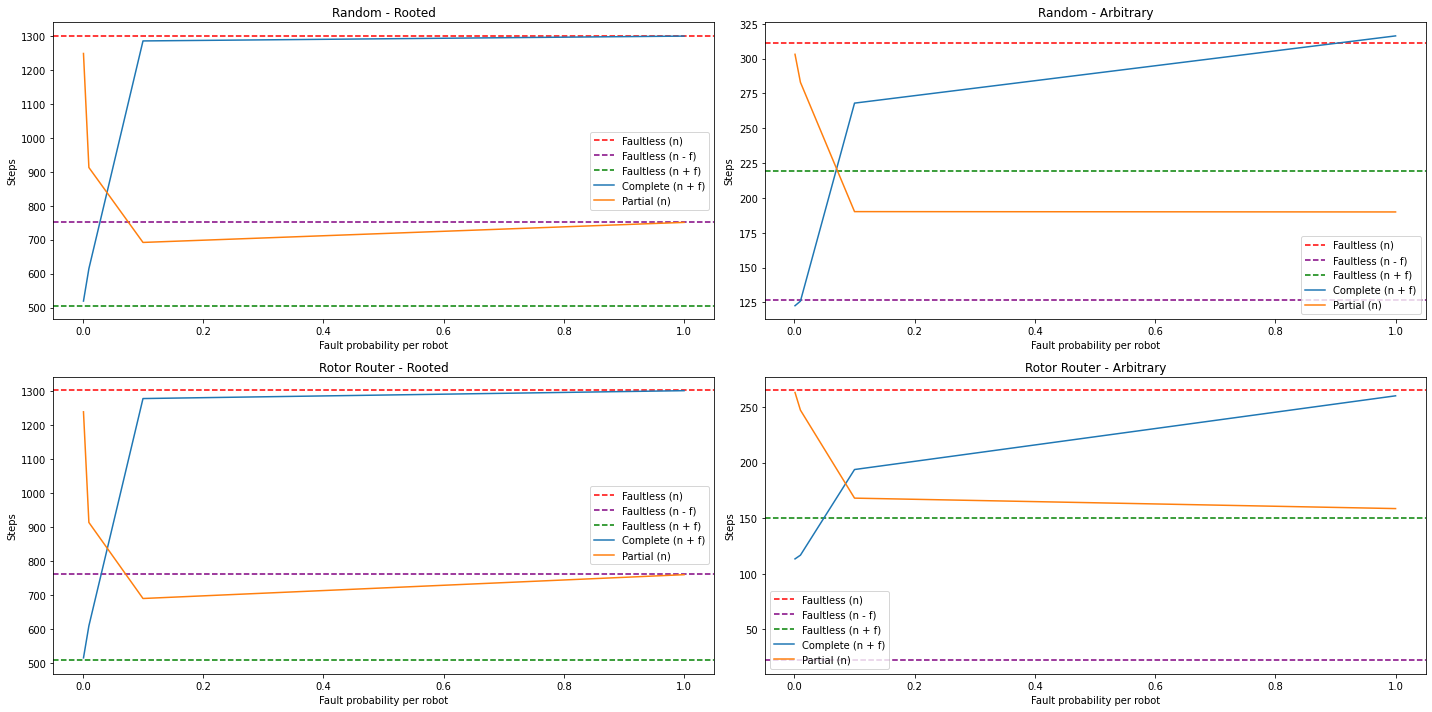

In [12]:
# LINEAR
linear_rw_fl_r_normal = faultless[(faultless["algorithm_type"] == "RANDOM") & (faultless["graph_type"] == "LINEAR") & (faultless["teams"] == 1) & (faultless["nodes"] == faultless["robots"])]["steps"].mean()
linear_rw_fl_r_plus = faultless[(faultless["algorithm_type"] == "RANDOM") & (faultless["graph_type"] == "LINEAR") & (faultless["teams"] == 1) & (faultless["nodes"] < faultless["robots"])]["steps"].mean()
linear_rw_fl_r_minus = faultless[(faultless["algorithm_type"] == "RANDOM") & (faultless["graph_type"] == "LINEAR") & (faultless["teams"] == 1) & (faultless["nodes"] > faultless["robots"])]["steps"].mean()
linear_rw_fy_c_r = faulty[(faulty["algorithm_type"] == "RANDOM") & (faulty["nodes"] < faulty["robots"]) & (faulty["graph_type"] == "LINEAR") & (faulty["teams"] == 1)].groupby("probability")["steps"].mean()
linear_rw_fy_p_r = faulty[(faulty["algorithm_type"] == "RANDOM") & (faulty["nodes"] >= faulty["robots"]) & (faulty["graph_type"] == "LINEAR") & (faulty["teams"] == 1)].groupby("probability")["steps"].mean()

linear_rw_fl_a_normal = faultless[(faultless["algorithm_type"] == "RANDOM") & (faultless["graph_type"] == "LINEAR") & (faultless["teams"] > 1) & (faultless["nodes"] == faultless["robots"])]["steps"].mean()
linear_rw_fl_a_plus = faultless[(faultless["algorithm_type"] == "RANDOM") & (faultless["graph_type"] == "LINEAR") & (faultless["teams"] > 1) & (faultless["nodes"] < faultless["robots"])]["steps"].mean()
linear_rw_fl_a_minus = faultless[(faultless["algorithm_type"] == "RANDOM") & (faultless["graph_type"] == "LINEAR") & (faultless["teams"] > 1) & (faultless["nodes"] > faultless["robots"])]["steps"].mean()
linear_rw_fy_c_a = faulty[(faulty["algorithm_type"] == "RANDOM") & (faulty["nodes"] < faulty["robots"]) & (faulty["graph_type"] == "LINEAR") & (faulty["teams"] > 1)].groupby("probability")["steps"].mean()
linear_rw_fy_p_a = faulty[(faulty["algorithm_type"] == "RANDOM") & (faulty["nodes"] >= faulty["robots"]) & (faulty["graph_type"] == "LINEAR") & (faulty["teams"] > 1)].groupby("probability")["steps"].mean()

linear_rr_fl_r_normal = faultless[(faultless["algorithm_type"] == "ROTOR_ROUTER") & (faultless["graph_type"] == "LINEAR") & (faultless["teams"] == 1) & (faultless["nodes"] == faultless["robots"])]["steps"].mean()
linear_rr_fl_r_plus = faultless[(faultless["algorithm_type"] == "ROTOR_ROUTER") & (faultless["graph_type"] == "LINEAR") & (faultless["teams"] == 1) & (faultless["nodes"] < faultless["robots"])]["steps"].mean()
linear_rr_fl_r_minus = faultless[(faultless["algorithm_type"] == "ROTOR_ROUTER") & (faultless["graph_type"] == "LINEAR") & (faultless["teams"] == 1) & (faultless["nodes"] > faultless["robots"])]["steps"].mean()
linear_rr_fy_c_r = faulty[(faulty["algorithm_type"] == "ROTOR_ROUTER") & (faulty["nodes"] < faulty["robots"]) & (faulty["graph_type"] == "LINEAR") & (faulty["teams"] == 1)].groupby("probability")["steps"].mean()
linear_rr_fy_p_r = faulty[(faulty["algorithm_type"] == "ROTOR_ROUTER") & (faulty["nodes"] >= faulty["robots"]) & (faulty["graph_type"] == "LINEAR") & (faulty["teams"] == 1)].groupby("probability")["steps"].mean()

linear_rr_fl_a_normal = faultless[(faultless["algorithm_type"] == "ROTOR_ROUTER") & (faultless["graph_type"] == "LINEAR") & (faultless["teams"] > 1) & (faultless["nodes"] == faultless["robots"])]["steps"].mean()
linear_rr_fl_a_plus = faultless[(faultless["algorithm_type"] == "ROTOR_ROUTER") & (faultless["graph_type"] == "LINEAR") & (faultless["teams"] > 1) & (faultless["nodes"] < faultless["robots"])]["steps"].mean()
linear_rr_fl_a_minus = faultless[(faultless["algorithm_type"] == "ROTOR_ROUTER") & (faultless["graph_type"] == "LINEAR") & (faultless["teams"] > 1) & (faultless["nodes"] > faultless["robots"])]["steps"].mean()
linear_rr_fy_c_a = faulty[(faulty["algorithm_type"] == "ROTOR_ROUTER") & (faulty["nodes"] < faulty["robots"]) & (faulty["graph_type"] == "LINEAR") & (faulty["teams"] > 1)].groupby("probability")["steps"].mean()
linear_rr_fy_p_a = faulty[(faulty["algorithm_type"] == "ROTOR_ROUTER") & (faulty["nodes"] >= faulty["robots"]) & (faulty["graph_type"] == "LINEAR") & (faulty["teams"] > 1)].groupby("probability")["steps"].mean()

# create a linear of plots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

# plot the data for the first chart
axs[0,0].axhline(y = linear_rw_fl_r_normal, color="red", linestyle="--", label = "Faultless (n)")
axs[0,0].axhline(y = linear_rw_fl_r_minus, color="purple", linestyle="--", label = "Faultless (n - f)")
axs[0,0].axhline(y = linear_rw_fl_r_plus, color="green", linestyle="--", label = "Faultless (n + f)")
axs[0,0].plot(linear_rw_fy_c_r.index, linear_rw_fy_c_r.values, label = "Complete (n + f)")
axs[0,0].plot(linear_rw_fy_p_r.index, linear_rw_fy_p_r.values, label = "Partial (n)")
axs[0,0].set_xlabel("Fault probability per robot")
axs[0,0].set_ylabel("Steps")
axs[0,0].set_title('Random - Rooted')
axs[0,0].legend()

# plot the data for the second chart
axs[0,1].axhline(y = linear_rw_fl_a_normal, color="red", linestyle="--", label = "Faultless (n)")
axs[0,1].axhline(y = linear_rw_fl_a_minus, color="purple", linestyle="--", label = "Faultless (n - f)")
axs[0,1].axhline(y = linear_rw_fl_a_plus, color="green", linestyle="--", label = "Faultless (n + f)")
axs[0,1].plot(linear_rw_fy_c_a.index, linear_rw_fy_c_a.values, label = "Complete (n + f)")
axs[0,1].plot(linear_rw_fy_p_a.index, linear_rw_fy_p_a.values, label = "Partial (n)")
axs[0,1].set_xlabel("Fault probability per robot")
axs[0,1].set_ylabel("Steps")
axs[0,1].set_title('Random - Arbitrary')
axs[0,1].legend()

# plot the data for the third chart
axs[1,0].axhline(y = linear_rr_fl_r_normal, color="red", linestyle="--", label = "Faultless (n)")
axs[1,0].axhline(y = linear_rr_fl_r_minus, color="purple", linestyle="--", label = "Faultless (n - f)")
axs[1,0].axhline(y = linear_rr_fl_r_plus, color="green", linestyle="--", label = "Faultless (n + f)")
axs[1,0].plot(linear_rr_fy_c_r.index, linear_rr_fy_c_r.values, label = "Complete (n + f)")
axs[1,0].plot(linear_rr_fy_p_r.index, linear_rr_fy_p_r.values, label = "Partial (n)")
axs[1,0].set_xlabel("Fault probability per robot")
axs[1,0].set_ylabel("Steps")
axs[1,0].set_title('Rotor Router - Rooted')
axs[1,0].legend()

# plot the data for the fourth chart
axs[1,1].axhline(y = linear_rr_fl_a_normal, color="red", linestyle="--", label = "Faultless (n)")
axs[1,1].axhline(y = linear_rr_fl_a_minus, color="purple", linestyle="--", label = "Faultless (n - f)")
axs[1,1].axhline(y = linear_rr_fl_a_plus, color="green", linestyle="--", label = "Faultless (n + f)")
axs[1,1].plot(linear_rr_fy_c_a.index, linear_rr_fy_c_a.values, label = "Complete (n + f)")
axs[1,1].plot(linear_rr_fy_p_a.index, linear_rr_fy_p_a.values, label = "Partial (n)")
axs[1,1].set_xlabel("Fault probability per robot")
axs[1,1].set_ylabel("Steps")
axs[1,1].set_title('Rotor Router - Arbitrary')
axs[1,1].legend()

# show the chart
plt.tight_layout()
plt.show()

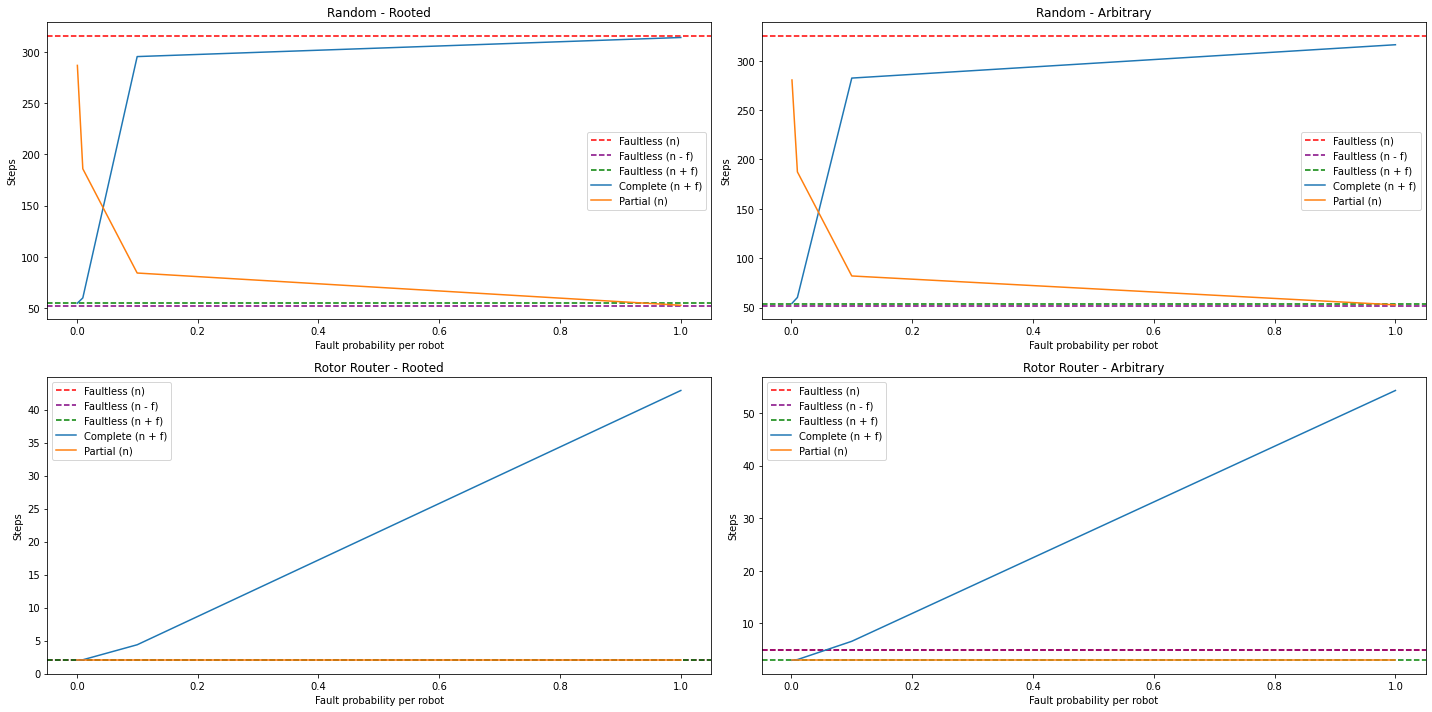

In [13]:
# STAR
star_rw_fl_r_normal = faultless[(faultless["algorithm_type"] == "RANDOM") & (faultless["graph_type"] == "STAR") & (faultless["teams"] == 1) & (faultless["nodes"] == faultless["robots"])]["steps"].mean()
star_rw_fl_r_plus = faultless[(faultless["algorithm_type"] == "RANDOM") & (faultless["graph_type"] == "STAR") & (faultless["teams"] == 1) & (faultless["nodes"] < faultless["robots"])]["steps"].mean()
star_rw_fl_r_minus = faultless[(faultless["algorithm_type"] == "RANDOM") & (faultless["graph_type"] == "STAR") & (faultless["teams"] == 1) & (faultless["nodes"] > faultless["robots"])]["steps"].mean()
star_rw_fy_c_r = faulty[(faulty["algorithm_type"] == "RANDOM") & (faulty["nodes"] < faulty["robots"]) & (faulty["graph_type"] == "STAR") & (faulty["teams"] == 1)].groupby("probability")["steps"].mean()
star_rw_fy_p_r = faulty[(faulty["algorithm_type"] == "RANDOM") & (faulty["nodes"] >= faulty["robots"]) & (faulty["graph_type"] == "STAR") & (faulty["teams"] == 1)].groupby("probability")["steps"].mean()

star_rw_fl_a_normal = faultless[(faultless["algorithm_type"] == "RANDOM") & (faultless["graph_type"] == "STAR") & (faultless["teams"] > 1) & (faultless["nodes"] == faultless["robots"])]["steps"].mean()
star_rw_fl_a_plus = faultless[(faultless["algorithm_type"] == "RANDOM") & (faultless["graph_type"] == "STAR") & (faultless["teams"] > 1) & (faultless["nodes"] < faultless["robots"])]["steps"].mean()
star_rw_fl_a_minus = faultless[(faultless["algorithm_type"] == "RANDOM") & (faultless["graph_type"] == "STAR") & (faultless["teams"] > 1) & (faultless["nodes"] > faultless["robots"])]["steps"].mean()
star_rw_fy_c_a = faulty[(faulty["algorithm_type"] == "RANDOM") & (faulty["nodes"] < faulty["robots"]) & (faulty["graph_type"] == "STAR") & (faulty["teams"] > 1)].groupby("probability")["steps"].mean()
star_rw_fy_p_a = faulty[(faulty["algorithm_type"] == "RANDOM") & (faulty["nodes"] >= faulty["robots"]) & (faulty["graph_type"] == "STAR") & (faulty["teams"] > 1)].groupby("probability")["steps"].mean()

star_rr_fl_r_normal = faultless[(faultless["algorithm_type"] == "ROTOR_ROUTER") & (faultless["graph_type"] == "STAR") & (faultless["teams"] == 1) & (faultless["nodes"] == faultless["robots"])]["steps"].mean()
star_rr_fl_r_plus = faultless[(faultless["algorithm_type"] == "ROTOR_ROUTER") & (faultless["graph_type"] == "STAR") & (faultless["teams"] == 1) & (faultless["nodes"] < faultless["robots"])]["steps"].mean()
star_rr_fl_r_minus = faultless[(faultless["algorithm_type"] == "ROTOR_ROUTER") & (faultless["graph_type"] == "STAR") & (faultless["teams"] == 1) & (faultless["nodes"] > faultless["robots"])]["steps"].mean()
star_rr_fy_c_r = faulty[(faulty["algorithm_type"] == "ROTOR_ROUTER") & (faulty["nodes"] < faulty["robots"]) & (faulty["graph_type"] == "STAR") & (faulty["teams"] == 1)].groupby("probability")["steps"].mean()
star_rr_fy_p_r = faulty[(faulty["algorithm_type"] == "ROTOR_ROUTER") & (faulty["nodes"] >= faulty["robots"]) & (faulty["graph_type"] == "STAR") & (faulty["teams"] == 1)].groupby("probability")["steps"].mean()

star_rr_fl_a_normal = faultless[(faultless["algorithm_type"] == "ROTOR_ROUTER") & (faultless["graph_type"] == "STAR") & (faultless["teams"] > 1) & (faultless["nodes"] == faultless["robots"])]["steps"].mean()
star_rr_fl_a_plus = faultless[(faultless["algorithm_type"] == "ROTOR_ROUTER") & (faultless["graph_type"] == "STAR") & (faultless["teams"] > 1) & (faultless["nodes"] < faultless["robots"])]["steps"].mean()
star_rr_fl_a_minus = faultless[(faultless["algorithm_type"] == "ROTOR_ROUTER") & (faultless["graph_type"] == "STAR") & (faultless["teams"] > 1) & (faultless["nodes"] > faultless["robots"])]["steps"].mean()
star_rr_fy_c_a = faulty[(faulty["algorithm_type"] == "ROTOR_ROUTER") & (faulty["nodes"] < faulty["robots"]) & (faulty["graph_type"] == "STAR") & (faulty["teams"] > 1)].groupby("probability")["steps"].mean()
star_rr_fy_p_a = faulty[(faulty["algorithm_type"] == "ROTOR_ROUTER") & (faulty["nodes"] >= faulty["robots"]) & (faulty["graph_type"] == "STAR") & (faulty["teams"] > 1)].groupby("probability")["steps"].mean()

# create a star of plots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

# plot the data for the first chart
axs[0,0].axhline(y = star_rw_fl_r_normal, color="red", linestyle="--", label = "Faultless (n)")
axs[0,0].axhline(y = star_rw_fl_r_minus, color="purple", linestyle="--", label = "Faultless (n - f)")
axs[0,0].axhline(y = star_rw_fl_r_plus, color="green", linestyle="--", label = "Faultless (n + f)")
axs[0,0].plot(star_rw_fy_c_r.index, star_rw_fy_c_r.values, label = "Complete (n + f)")
axs[0,0].plot(star_rw_fy_p_r.index, star_rw_fy_p_r.values, label = "Partial (n)")
axs[0,0].set_xlabel("Fault probability per robot")
axs[0,0].set_ylabel("Steps")
axs[0,0].set_title('Random - Rooted')
axs[0,0].legend()

# plot the data for the second chart
axs[0,1].axhline(y = star_rw_fl_a_normal, color="red", linestyle="--", label = "Faultless (n)")
axs[0,1].axhline(y = star_rw_fl_a_minus, color="purple", linestyle="--", label = "Faultless (n - f)")
axs[0,1].axhline(y = star_rw_fl_a_plus, color="green", linestyle="--", label = "Faultless (n + f)")
axs[0,1].plot(star_rw_fy_c_a.index, star_rw_fy_c_a.values, label = "Complete (n + f)")
axs[0,1].plot(star_rw_fy_p_a.index, star_rw_fy_p_a.values, label = "Partial (n)")
axs[0,1].set_xlabel("Fault probability per robot")
axs[0,1].set_ylabel("Steps")
axs[0,1].set_title('Random - Arbitrary')
axs[0,1].legend()

# plot the data for the third chart
axs[1,0].axhline(y = star_rr_fl_r_normal, color="red", linestyle="--", label = "Faultless (n)")
axs[1,0].axhline(y = star_rr_fl_r_minus, color="purple", linestyle="--", label = "Faultless (n - f)")
axs[1,0].axhline(y = star_rr_fl_r_plus, color="green", linestyle="--", label = "Faultless (n + f)")
axs[1,0].plot(star_rr_fy_c_r.index, star_rr_fy_c_r.values, label = "Complete (n + f)")
axs[1,0].plot(star_rr_fy_p_r.index, star_rr_fy_p_r.values, label = "Partial (n)")
axs[1,0].set_xlabel("Fault probability per robot")
axs[1,0].set_ylabel("Steps")
axs[1,0].set_title('Rotor Router - Rooted')
axs[1,0].legend()

# plot the data for the fourth chart
axs[1,1].axhline(y = star_rr_fl_a_normal, color="red", linestyle="--", label = "Faultless (n)")
axs[1,1].axhline(y = star_rr_fl_a_minus, color="purple", linestyle="--", label = "Faultless (n - f)")
axs[1,1].axhline(y = star_rr_fl_a_plus, color="green", linestyle="--", label = "Faultless (n + f)")
axs[1,1].plot(star_rr_fy_c_a.index, star_rr_fy_c_a.values, label = "Complete (n + f)")
axs[1,1].plot(star_rr_fy_p_a.index, star_rr_fy_p_a.values, label = "Partial (n)")
axs[1,1].set_xlabel("Fault probability per robot")
axs[1,1].set_ylabel("Steps")
axs[1,1].set_title('Rotor Router - Arbitrary')
axs[1,1].legend()

# show the chart
plt.tight_layout()
plt.show()

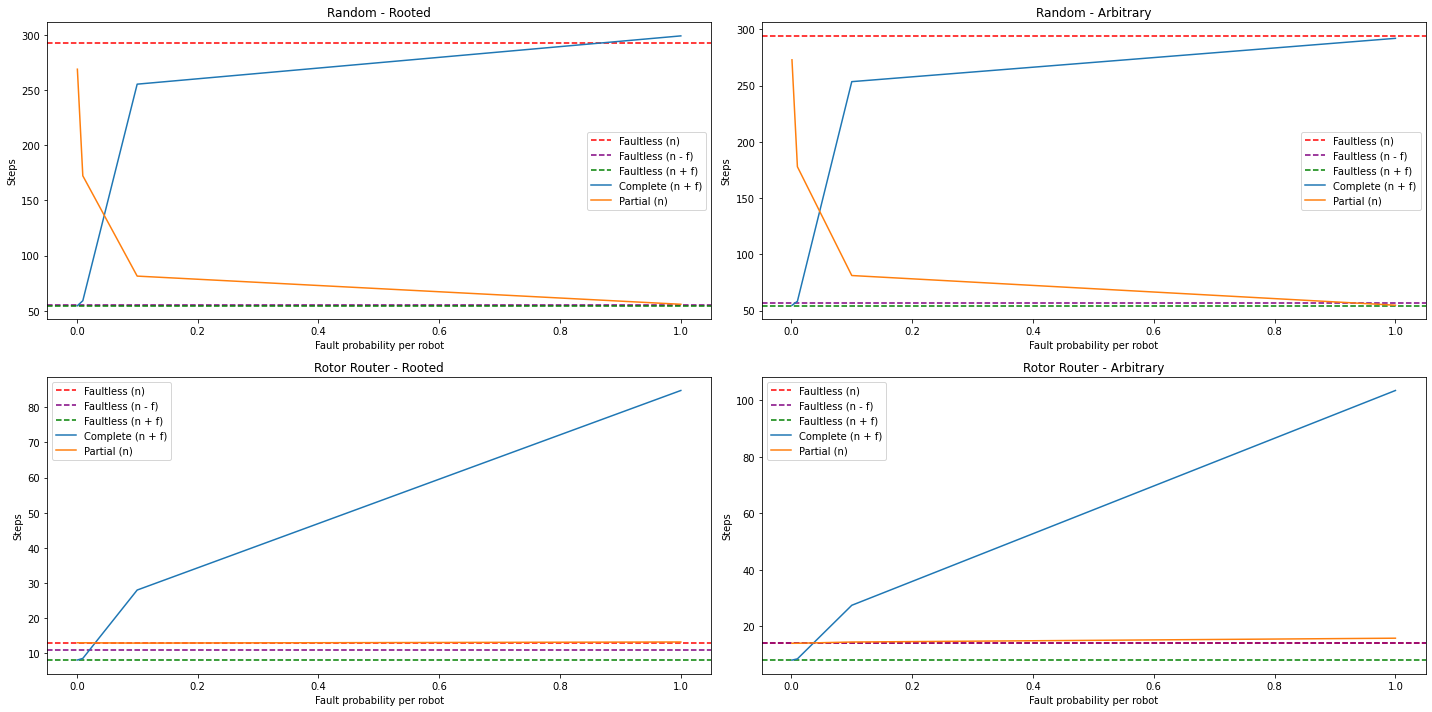

In [14]:
# WHEEL
wheel_rw_fl_r_normal = faultless[(faultless["algorithm_type"] == "RANDOM") & (faultless["graph_type"] == "WHEEL") & (faultless["teams"] == 1) & (faultless["nodes"] == faultless["robots"])]["steps"].mean()
wheel_rw_fl_r_plus = faultless[(faultless["algorithm_type"] == "RANDOM") & (faultless["graph_type"] == "WHEEL") & (faultless["teams"] == 1) & (faultless["nodes"] < faultless["robots"])]["steps"].mean()
wheel_rw_fl_r_minus = faultless[(faultless["algorithm_type"] == "RANDOM") & (faultless["graph_type"] == "WHEEL") & (faultless["teams"] == 1) & (faultless["nodes"] > faultless["robots"])]["steps"].mean()
wheel_rw_fy_c_r = faulty[(faulty["algorithm_type"] == "RANDOM") & (faulty["nodes"] < faulty["robots"]) & (faulty["graph_type"] == "WHEEL") & (faulty["teams"] == 1)].groupby("probability")["steps"].mean()
wheel_rw_fy_p_r = faulty[(faulty["algorithm_type"] == "RANDOM") & (faulty["nodes"] >= faulty["robots"]) & (faulty["graph_type"] == "WHEEL") & (faulty["teams"] == 1)].groupby("probability")["steps"].mean()

wheel_rw_fl_a_normal = faultless[(faultless["algorithm_type"] == "RANDOM") & (faultless["graph_type"] == "WHEEL") & (faultless["teams"] > 1) & (faultless["nodes"] == faultless["robots"])]["steps"].mean()
wheel_rw_fl_a_plus = faultless[(faultless["algorithm_type"] == "RANDOM") & (faultless["graph_type"] == "WHEEL") & (faultless["teams"] > 1) & (faultless["nodes"] < faultless["robots"])]["steps"].mean()
wheel_rw_fl_a_minus = faultless[(faultless["algorithm_type"] == "RANDOM") & (faultless["graph_type"] == "WHEEL") & (faultless["teams"] > 1) & (faultless["nodes"] > faultless["robots"])]["steps"].mean()
wheel_rw_fy_c_a = faulty[(faulty["algorithm_type"] == "RANDOM") & (faulty["nodes"] < faulty["robots"]) & (faulty["graph_type"] == "WHEEL") & (faulty["teams"] > 1)].groupby("probability")["steps"].mean()
wheel_rw_fy_p_a = faulty[(faulty["algorithm_type"] == "RANDOM") & (faulty["nodes"] >= faulty["robots"]) & (faulty["graph_type"] == "WHEEL") & (faulty["teams"] > 1)].groupby("probability")["steps"].mean()

wheel_rr_fl_r_normal = faultless[(faultless["algorithm_type"] == "ROTOR_ROUTER") & (faultless["graph_type"] == "WHEEL") & (faultless["teams"] == 1) & (faultless["nodes"] == faultless["robots"])]["steps"].mean()
wheel_rr_fl_r_plus = faultless[(faultless["algorithm_type"] == "ROTOR_ROUTER") & (faultless["graph_type"] == "WHEEL") & (faultless["teams"] == 1) & (faultless["nodes"] < faultless["robots"])]["steps"].mean()
wheel_rr_fl_r_minus = faultless[(faultless["algorithm_type"] == "ROTOR_ROUTER") & (faultless["graph_type"] == "WHEEL") & (faultless["teams"] == 1) & (faultless["nodes"] > faultless["robots"])]["steps"].mean()
wheel_rr_fy_c_r = faulty[(faulty["algorithm_type"] == "ROTOR_ROUTER") & (faulty["nodes"] < faulty["robots"]) & (faulty["graph_type"] == "WHEEL") & (faulty["teams"] == 1)].groupby("probability")["steps"].mean()
wheel_rr_fy_p_r = faulty[(faulty["algorithm_type"] == "ROTOR_ROUTER") & (faulty["nodes"] >= faulty["robots"]) & (faulty["graph_type"] == "WHEEL") & (faulty["teams"] == 1)].groupby("probability")["steps"].mean()

wheel_rr_fl_a_normal = faultless[(faultless["algorithm_type"] == "ROTOR_ROUTER") & (faultless["graph_type"] == "WHEEL") & (faultless["teams"] > 1) & (faultless["nodes"] == faultless["robots"])]["steps"].mean()
wheel_rr_fl_a_plus = faultless[(faultless["algorithm_type"] == "ROTOR_ROUTER") & (faultless["graph_type"] == "WHEEL") & (faultless["teams"] > 1) & (faultless["nodes"] < faultless["robots"])]["steps"].mean()
wheel_rr_fl_a_minus = faultless[(faultless["algorithm_type"] == "ROTOR_ROUTER") & (faultless["graph_type"] == "WHEEL") & (faultless["teams"] > 1) & (faultless["nodes"] > faultless["robots"])]["steps"].mean()
wheel_rr_fy_c_a = faulty[(faulty["algorithm_type"] == "ROTOR_ROUTER") & (faulty["nodes"] < faulty["robots"]) & (faulty["graph_type"] == "WHEEL") & (faulty["teams"] > 1)].groupby("probability")["steps"].mean()
wheel_rr_fy_p_a = faulty[(faulty["algorithm_type"] == "ROTOR_ROUTER") & (faulty["nodes"] >= faulty["robots"]) & (faulty["graph_type"] == "WHEEL") & (faulty["teams"] > 1)].groupby("probability")["steps"].mean()

# create a wheel of plots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

# plot the data for the first chart
axs[0,0].axhline(y = wheel_rw_fl_r_normal, color="red", linestyle="--", label = "Faultless (n)")
axs[0,0].axhline(y = wheel_rw_fl_r_minus, color="purple", linestyle="--", label = "Faultless (n - f)")
axs[0,0].axhline(y = wheel_rw_fl_r_plus, color="green", linestyle="--", label = "Faultless (n + f)")
axs[0,0].plot(wheel_rw_fy_c_r.index, wheel_rw_fy_c_r.values, label = "Complete (n + f)")
axs[0,0].plot(wheel_rw_fy_p_r.index, wheel_rw_fy_p_r.values, label = "Partial (n)")
axs[0,0].set_xlabel("Fault probability per robot")
axs[0,0].set_ylabel("Steps")
axs[0,0].set_title('Random - Rooted')
axs[0,0].legend()

# plot the data for the second chart
axs[0,1].axhline(y = wheel_rw_fl_a_normal, color="red", linestyle="--", label = "Faultless (n)")
axs[0,1].axhline(y = wheel_rw_fl_a_minus, color="purple", linestyle="--", label = "Faultless (n - f)")
axs[0,1].axhline(y = wheel_rw_fl_a_plus, color="green", linestyle="--", label = "Faultless (n + f)")
axs[0,1].plot(wheel_rw_fy_c_a.index, wheel_rw_fy_c_a.values, label = "Complete (n + f)")
axs[0,1].plot(wheel_rw_fy_p_a.index, wheel_rw_fy_p_a.values, label = "Partial (n)")
axs[0,1].set_xlabel("Fault probability per robot")
axs[0,1].set_ylabel("Steps")
axs[0,1].set_title('Random - Arbitrary')
axs[0,1].legend()

# plot the data for the third chart
axs[1,0].axhline(y = wheel_rr_fl_r_normal, color="red", linestyle="--", label = "Faultless (n)")
axs[1,0].axhline(y = wheel_rr_fl_r_minus, color="purple", linestyle="--", label = "Faultless (n - f)")
axs[1,0].axhline(y = wheel_rr_fl_r_plus, color="green", linestyle="--", label = "Faultless (n + f)")
axs[1,0].plot(wheel_rr_fy_c_r.index, wheel_rr_fy_c_r.values, label = "Complete (n + f)")
axs[1,0].plot(wheel_rr_fy_p_r.index, wheel_rr_fy_p_r.values, label = "Partial (n)")
axs[1,0].set_xlabel("Fault probability per robot")
axs[1,0].set_ylabel("Steps")
axs[1,0].set_title('Rotor Router - Rooted')
axs[1,0].legend()

# plot the data for the fourth chart
axs[1,1].axhline(y = wheel_rr_fl_a_normal, color="red", linestyle="--", label = "Faultless (n)")
axs[1,1].axhline(y = wheel_rr_fl_a_minus, color="purple", linestyle="--", label = "Faultless (n - f)")
axs[1,1].axhline(y = wheel_rr_fl_a_plus, color="green", linestyle="--", label = "Faultless (n + f)")
axs[1,1].plot(wheel_rr_fy_c_a.index, wheel_rr_fy_c_a.values, label = "Complete (n + f)")
axs[1,1].plot(wheel_rr_fy_p_a.index, wheel_rr_fy_p_a.values, label = "Partial (n)")
axs[1,1].set_xlabel("Fault probability per robot")
axs[1,1].set_ylabel("Steps")
axs[1,1].set_title('Rotor Router - Arbitrary')
axs[1,1].legend()

# show the chart
plt.tight_layout()
plt.show()

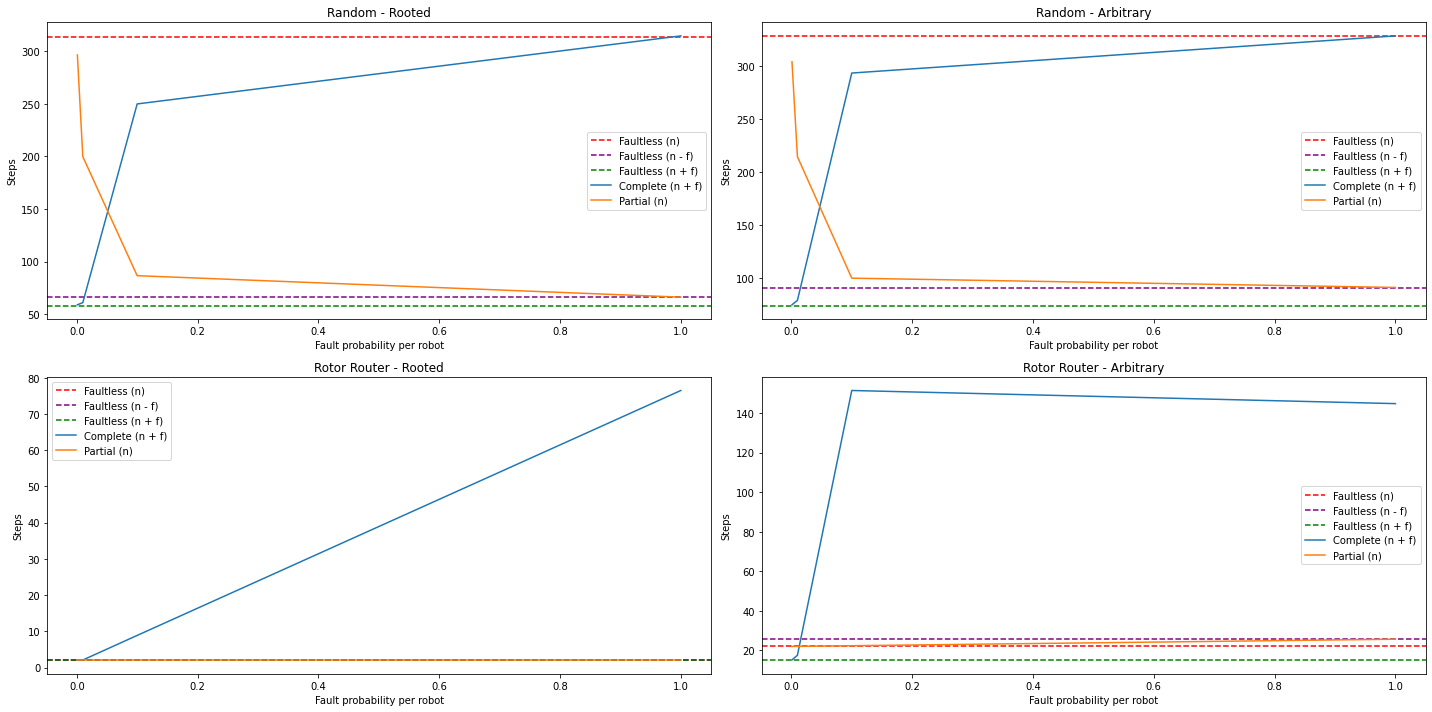

In [15]:
# WINDMILL
windmill_rw_fl_r_normal = faultless[(faultless["algorithm_type"] == "RANDOM") & (faultless["graph_type"] == "WINDMILL") & (faultless["teams"] == 1) & (faultless["nodes"] == faultless["robots"])]["steps"].mean()
windmill_rw_fl_r_plus = faultless[(faultless["algorithm_type"] == "RANDOM") & (faultless["graph_type"] == "WINDMILL") & (faultless["teams"] == 1) & (faultless["nodes"] < faultless["robots"])]["steps"].mean()
windmill_rw_fl_r_minus = faultless[(faultless["algorithm_type"] == "RANDOM") & (faultless["graph_type"] == "WINDMILL") & (faultless["teams"] == 1) & (faultless["nodes"] > faultless["robots"])]["steps"].mean()
windmill_rw_fy_c_r = faulty[(faulty["algorithm_type"] == "RANDOM") & (faulty["nodes"] < faulty["robots"]) & (faulty["graph_type"] == "WINDMILL") & (faulty["teams"] == 1)].groupby("probability")["steps"].mean()
windmill_rw_fy_p_r = faulty[(faulty["algorithm_type"] == "RANDOM") & (faulty["nodes"] >= faulty["robots"]) & (faulty["graph_type"] == "WINDMILL") & (faulty["teams"] == 1)].groupby("probability")["steps"].mean()

windmill_rw_fl_a_normal = faultless[(faultless["algorithm_type"] == "RANDOM") & (faultless["graph_type"] == "WINDMILL") & (faultless["teams"] > 1) & (faultless["nodes"] == faultless["robots"])]["steps"].mean()
windmill_rw_fl_a_plus = faultless[(faultless["algorithm_type"] == "RANDOM") & (faultless["graph_type"] == "WINDMILL") & (faultless["teams"] > 1) & (faultless["nodes"] < faultless["robots"])]["steps"].mean()
windmill_rw_fl_a_minus = faultless[(faultless["algorithm_type"] == "RANDOM") & (faultless["graph_type"] == "WINDMILL") & (faultless["teams"] > 1) & (faultless["nodes"] > faultless["robots"])]["steps"].mean()
windmill_rw_fy_c_a = faulty[(faulty["algorithm_type"] == "RANDOM") & (faulty["nodes"] < faulty["robots"]) & (faulty["graph_type"] == "WINDMILL") & (faulty["teams"] > 1)].groupby("probability")["steps"].mean()
windmill_rw_fy_p_a = faulty[(faulty["algorithm_type"] == "RANDOM") & (faulty["nodes"] >= faulty["robots"]) & (faulty["graph_type"] == "WINDMILL") & (faulty["teams"] > 1)].groupby("probability")["steps"].mean()

windmill_rr_fl_r_normal = faultless[(faultless["algorithm_type"] == "ROTOR_ROUTER") & (faultless["graph_type"] == "WINDMILL") & (faultless["teams"] == 1) & (faultless["nodes"] == faultless["robots"])]["steps"].mean()
windmill_rr_fl_r_plus = faultless[(faultless["algorithm_type"] == "ROTOR_ROUTER") & (faultless["graph_type"] == "WINDMILL") & (faultless["teams"] == 1) & (faultless["nodes"] < faultless["robots"])]["steps"].mean()
windmill_rr_fl_r_minus = faultless[(faultless["algorithm_type"] == "ROTOR_ROUTER") & (faultless["graph_type"] == "WINDMILL") & (faultless["teams"] == 1) & (faultless["nodes"] > faultless["robots"])]["steps"].mean()
windmill_rr_fy_c_r = faulty[(faulty["algorithm_type"] == "ROTOR_ROUTER") & (faulty["nodes"] < faulty["robots"]) & (faulty["graph_type"] == "WINDMILL") & (faulty["teams"] == 1)].groupby("probability")["steps"].mean()
windmill_rr_fy_p_r = faulty[(faulty["algorithm_type"] == "ROTOR_ROUTER") & (faulty["nodes"] >= faulty["robots"]) & (faulty["graph_type"] == "WINDMILL") & (faulty["teams"] == 1)].groupby("probability")["steps"].mean()

windmill_rr_fl_a_normal = faultless[(faultless["algorithm_type"] == "ROTOR_ROUTER") & (faultless["graph_type"] == "WINDMILL") & (faultless["teams"] > 1) & (faultless["nodes"] == faultless["robots"])]["steps"].mean()
windmill_rr_fl_a_plus = faultless[(faultless["algorithm_type"] == "ROTOR_ROUTER") & (faultless["graph_type"] == "WINDMILL") & (faultless["teams"] > 1) & (faultless["nodes"] < faultless["robots"])]["steps"].mean()
windmill_rr_fl_a_minus = faultless[(faultless["algorithm_type"] == "ROTOR_ROUTER") & (faultless["graph_type"] == "WINDMILL") & (faultless["teams"] > 1) & (faultless["nodes"] > faultless["robots"])]["steps"].mean()
windmill_rr_fy_c_a = faulty[(faulty["algorithm_type"] == "ROTOR_ROUTER") & (faulty["nodes"] < faulty["robots"]) & (faulty["graph_type"] == "WINDMILL") & (faulty["teams"] > 1)].groupby("probability")["steps"].mean()
windmill_rr_fy_p_a = faulty[(faulty["algorithm_type"] == "ROTOR_ROUTER") & (faulty["nodes"] >= faulty["robots"]) & (faulty["graph_type"] == "WINDMILL") & (faulty["teams"] > 1)].groupby("probability")["steps"].mean()

# create a windmill of plots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

# plot the data for the first chart
axs[0,0].axhline(y = windmill_rw_fl_r_normal, color="red", linestyle="--", label = "Faultless (n)")
axs[0,0].axhline(y = windmill_rw_fl_r_minus, color="purple", linestyle="--", label = "Faultless (n - f)")
axs[0,0].axhline(y = windmill_rw_fl_r_plus, color="green", linestyle="--", label = "Faultless (n + f)")
axs[0,0].plot(windmill_rw_fy_c_r.index, windmill_rw_fy_c_r.values, label = "Complete (n + f)")
axs[0,0].plot(windmill_rw_fy_p_r.index, windmill_rw_fy_p_r.values, label = "Partial (n)")
axs[0,0].set_xlabel("Fault probability per robot")
axs[0,0].set_ylabel("Steps")
axs[0,0].set_title('Random - Rooted')
axs[0,0].legend()

# plot the data for the second chart
axs[0,1].axhline(y = windmill_rw_fl_a_normal, color="red", linestyle="--", label = "Faultless (n)")
axs[0,1].axhline(y = windmill_rw_fl_a_minus, color="purple", linestyle="--", label = "Faultless (n - f)")
axs[0,1].axhline(y = windmill_rw_fl_a_plus, color="green", linestyle="--", label = "Faultless (n + f)")
axs[0,1].plot(windmill_rw_fy_c_a.index, windmill_rw_fy_c_a.values, label = "Complete (n + f)")
axs[0,1].plot(windmill_rw_fy_p_a.index, windmill_rw_fy_p_a.values, label = "Partial (n)")
axs[0,1].set_xlabel("Fault probability per robot")
axs[0,1].set_ylabel("Steps")
axs[0,1].set_title('Random - Arbitrary')
axs[0,1].legend()

# plot the data for the third chart
axs[1,0].axhline(y = windmill_rr_fl_r_normal, color="red", linestyle="--", label = "Faultless (n)")
axs[1,0].axhline(y = windmill_rr_fl_r_minus, color="purple", linestyle="--", label = "Faultless (n - f)")
axs[1,0].axhline(y = windmill_rr_fl_r_plus, color="green", linestyle="--", label = "Faultless (n + f)")
axs[1,0].plot(windmill_rr_fy_c_r.index, windmill_rr_fy_c_r.values, label = "Complete (n + f)")
axs[1,0].plot(windmill_rr_fy_p_r.index, windmill_rr_fy_p_r.values, label = "Partial (n)")
axs[1,0].set_xlabel("Fault probability per robot")
axs[1,0].set_ylabel("Steps")
axs[1,0].set_title('Rotor Router - Rooted')
axs[1,0].legend()

# plot the data for the fourth chart
axs[1,1].axhline(y = windmill_rr_fl_a_normal, color="red", linestyle="--", label = "Faultless (n)")
axs[1,1].axhline(y = windmill_rr_fl_a_minus, color="purple", linestyle="--", label = "Faultless (n - f)")
axs[1,1].axhline(y = windmill_rr_fl_a_plus, color="green", linestyle="--", label = "Faultless (n + f)")
axs[1,1].plot(windmill_rr_fy_c_a.index, windmill_rr_fy_c_a.values, label = "Complete (n + f)")
axs[1,1].plot(windmill_rr_fy_p_a.index, windmill_rr_fy_p_a.values, label = "Partial (n)")
axs[1,1].set_xlabel("Fault probability per robot")
axs[1,1].set_ylabel("Steps")
axs[1,1].set_title('Rotor Router - Arbitrary')
axs[1,1].legend()

# show the chart
plt.tight_layout()
plt.show()